#Install libraries

In [ ]:
install.packages(c("readxl", "TTR", "tseries", "forecast", "imputeTS", "ggplot2","dplyr","zoo","VIM","e1071","polynom","pracma","reshape2","locfit","aTSA"))
library(readxl); library(TTR); library(tseries); library(forecast); library(imputeTS); library(ggplot2); library(dplyr); library(zoo); library(e1071); library(polynom); library(pracma); library(reshape2); library(locfit); library(aTSA); library(VIM)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘imputeTS’


The following object is masked from ‘package:tseries’:

    na.remove



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following object is masked from ‘package:xgboost’:

    slice


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following object is masked from ‘package:imputeTS’:

    na.locf


The following objects are masked from ‘package:data.table’:

    yearmon, yearqtr


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element



Attaching package: ‘pracma’


The following object is masked from ‘package:polynom’:

#Check data

In [ ]:
data= read_xlsx('/content/missing.xlsx')
data

Outstanding_Balance_Billions
<dbl>
488.15
501.66
475.30
497.93
NA
568.52
550.47
510.29
536.97


In [ ]:
data <- data["Outstanding_Balance_Billions"]

In [ ]:
data

Outstanding_Balance_Billions
<dbl>
488.15
501.66
475.30
497.93
NA
568.52
550.47
510.29
536.97


In [ ]:
DL=ts(data,frequency=12, start=c(2017,1))

In [ ]:
print(DL)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2017 488.15 501.66 475.30 497.93     NA 568.52 550.47 510.29 536.97 533.11
2018 493.42 509.55 532.45     NA 565.55 552.60 545.45 533.59 579.56 551.68
2019 540.21     NA 557.49 564.92 595.51 578.22 558.14 541.98 576.30 563.91
2020 561.02 550.66 582.08 603.61 617.22 584.54     NA 582.62 580.28 643.44
2021 582.09 613.31     NA 593.50 616.64 613.60 653.26 648.77 613.34 639.88
2022 644.12 601.43 615.54 635.51 654.13     NA 691.10 656.60 637.28 682.03
2023 632.61 643.68 679.35 669.49 674.95 709.38 669.10     NA 673.27 683.81
2024 689.12 670.63     NA 717.14 747.37 721.54 751.26 723.81     NA 748.64
        Nov    Dec
2017     NA 527.22
2018 559.55 585.33
2019 606.32     NA
2020 645.24 648.23
2021     NA 637.65
2022 655.87     NA
2023 715.89 684.49
2024 739.20 753.31


In [ ]:
sum(is.na(DL))

[1] 13

In [ ]:
percentage_na = (sum(is.na(DL)) / length(DL)) * 100
percentage_na

[1] 13.54167

In [ ]:
miss_index <- which(is.na(DL))
miss_index

[1]  5 11 16 26 36 43 51 59 66 72 80 87 93

#SVMI

In [ ]:

df <- data.frame(
  revenue = as.numeric(DL),
  time_idx = 1:length(DL)
)

if (any(is.na(df$revenue))) {
  train <- df[!is.na(df$revenue), ]
  test  <- df[is.na(df$revenue), , drop = FALSE]

  tune_result <- tune(
    svm,
    revenue ~ time_idx,
    data = train,
    kernel = "radial",
    ranges = list(cost = 2^(2:8), gamma = 2^(-5:-1))
  )

  best_model <- tune_result$best.model

  future_points <- data.frame(time_idx = df$time_idx)
  pred_full <- predict(best_model, newdata = future_points)

  df$revenue[is.na(df$revenue)] <- pred_full[is.na(df$revenue)]
}

data_SVMI <- ts(df$revenue, start = c(2017, 1), frequency = 12)
print(" SVM Imputation (tuned only):")
print(data_SVMI)


[1] " SVM Imputation (tuned only):"
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 488.1500 501.6600 475.3000 497.9300 508.7949 568.5200 550.4700 510.2900
2018 493.4200 509.5500 532.4500 541.6384 565.5500 552.6000 545.4500 533.5900
2019 540.2100 558.2210 557.4900 564.9200 595.5100 578.2200 558.1400 541.9800
2020 561.0200 550.6600 582.0800 603.6100 617.2200 584.5400 592.0745 582.6200
2021 582.0900 613.3100 613.9507 593.5000 616.6400 613.6000 653.2600 648.7700
2022 644.1200 601.4300 615.5400 635.5100 654.1300 646.1464 691.1000 656.6000
2023 632.6100 643.6800 679.3500 669.4900 674.9500 709.3800 669.1000 677.3441
2024 689.1200 670.6300 705.3909 717.1400 747.3700 721.5400 751.2600 723.8100
          Sep      Oct      Nov      Dec
2017 536.9700 533.1100 529.0904 527.2200
2018 579.5600 551.6800 559.5500 585.3300
2019 576.3000 563.9100 606.3200 575.2109
2020 580.2800 643.4400 645.2400 648.2300
2021 613.3400 639.8800 633.1576 637.6500
2022 637.2800 682.0300 65

#MEDIAN

In [ ]:
median_value <- median(DL, na.rm = TRUE)
data_MEDIAN <- DL
data_MEDIAN[is.na(data_MEDIAN)] <- median_value

print(data_MEDIAN)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2017 488.15 501.66 475.30 497.93 613.31 568.52 550.47 510.29 536.97 533.11
2018 493.42 509.55 532.45 613.31 565.55 552.60 545.45 533.59 579.56 551.68
2019 540.21 613.31 557.49 564.92 595.51 578.22 558.14 541.98 576.30 563.91
2020 561.02 550.66 582.08 603.61 617.22 584.54 613.31 582.62 580.28 643.44
2021 582.09 613.31 613.31 593.50 616.64 613.60 653.26 648.77 613.34 639.88
2022 644.12 601.43 615.54 635.51 654.13 613.31 691.10 656.60 637.28 682.03
2023 632.61 643.68 679.35 669.49 674.95 709.38 669.10 613.31 673.27 683.81
2024 689.12 670.63 613.31 717.14 747.37 721.54 751.26 723.81 613.31 748.64
        Nov    Dec
2017 613.31 527.22
2018 559.55 585.33
2019 606.32 613.31
2020 645.24 648.23
2021 613.31 637.65
2022 655.87 613.31
2023 715.89 684.49
2024 739.20 753.31


#PI

In [ ]:
idx <- 1:length(DL)
idx_na <- idx[is.na(DL)]
idx_valid <- idx[!is.na(DL)]
rev_valid <- DL[!is.na(DL)]
data_PI <- DL

window <- 4
degree <- 2

for (i in idx_na) {
  neighbor_idx <- idx_valid[abs(idx_valid - i) <= window]
  neighbor_y <- DL[neighbor_idx]

  if (length(neighbor_idx) >= degree + 1) {
    model <- lm(neighbor_y ~ poly(neighbor_idx, degree, raw = TRUE))
    data_PI[i] <- predict(model, newdata = data.frame(neighbor_idx = i))
  }
}
print(data_PI)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 488.1500 501.6600 475.3000 497.9300 524.6111 568.5200 550.4700 510.2900
2018 493.4200 509.5500 532.4500 540.5990 565.5500 552.6000 545.4500 533.5900
2019 540.2100 561.5028 557.4900 564.9200 595.5100 578.2200 558.1400 541.9800
2020 561.0200 550.6600 582.0800 603.6100 617.2200 584.5400 589.6170 582.6200
2021 582.0900 613.3100 594.8566 593.5000 616.6400 613.6000 653.2600 648.7700
2022 644.1200 601.4300 615.5400 635.5100 654.1300 660.5903 691.1000 656.6000
2023 632.6100 643.6800 679.3500 669.4900 674.9500 709.3800 669.1000 685.2359
2024 689.1200 670.6300 696.7265 717.1400 747.3700 721.5400 751.2600 723.8100
          Sep      Oct      Nov      Dec
2017 536.9700 533.1100 517.3225 527.2200
2018 579.5600 551.6800 559.5500 585.3300
2019 576.3000 563.9100 606.3200 573.6309
2020 580.2800 643.4400 645.2400 648.2300
2021 613.3400 639.8800 633.0556 637.6500
2022 637.2800 682.0300 655.8700 650.3810
2023 673.2700 683.81

In [ ]:
Data= read_xlsx('/content/no mis.xlsx')
Data

Outstanding_Balance_Billions
<dbl>
488.15
501.66
475.30
497.93
516.35
568.52
550.47
510.29
536.97


In [ ]:
Data <- Data["Outstanding_Balance_Billions"]

In [ ]:
dl=ts(Data,frequency=12, start=c(2017,1))
dl

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,488.15,501.66,475.30,497.93,516.35,568.52,550.47,510.29,536.97,533.11,515.54,527.22
2018,493.42,509.55,532.45,500.97,565.55,552.60,545.45,533.59,579.56,551.68,559.55,585.33
2019,540.21,552.53,557.49,564.92,595.51,578.22,558.14,541.98,576.30,563.91,606.32,605.09
2020,561.02,550.66,582.08,603.61,617.22,584.54,643.00,582.62,580.28,643.44,645.24,648.23
2021,582.09,613.31,610.52,593.50,616.64,613.60,653.26,648.77,613.34,639.88,659.85,637.65
2022,644.12,601.43,615.54,635.51,654.13,653.59,691.10,656.60,637.28,682.03,655.87,724.64
2023,632.61,643.68,679.35,669.49,674.95,709.38,669.10,710.20,673.27,683.81,715.89,684.49
2024,689.12,670.63,715.96,717.14,747.37,721.54,751.26,723.81,723.72,748.64,739.20,753.31
2025,713.16,723.04,742.41,712.63,794.57,811.05,,,,,,


In [ ]:
length(dl)

[1] 102

In [ ]:
train <- window(dl, end = c(2024, 12))
test <- window(dl, start = c(2025, 1))
print(test)

        Jan    Feb    Mar    Apr    May    Jun
2025 713.16 723.04 742.41 712.63 794.57 811.05


In [ ]:

result_df <- data.frame(
  Original = train,
  PI   = as.numeric(data_PI),
  SVMI      = as.numeric(data_SVMI),
  MEDIAN     = as.numeric(data_MEDIAN)
)
head(result_df)

,Outstanding_Balance_Billions,PI,SVMI,MEDIAN
,<dbl>,<dbl>,<dbl>,<dbl>
1,488.15,488.1500,488.1500,488.15
2,501.66,501.6600,501.6600,501.66
3,475.30,475.3000,475.3000,475.30
4,497.93,497.9300,497.9300,497.93
5,516.35,524.6111,508.7949,613.31
6,568.52,568.5200,568.5200,568.52


In [ ]:
install.packages("writexl")
library(writexl)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
write_xlsx(result_df, "missing_methods.xlsx")


In [ ]:
install.packages(c( "Metrics", "caret"), dependencies = TRUE)

library(Metrics)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall




In [ ]:
file_path <- "missing_methods.xlsx"
data <- read_excel(file_path)
print(head(data))

# A tibble: 6 × 4
  Outstanding_Balance_Billions    PI  SVMI MEDIAN
                         <dbl> <dbl> <dbl>  <dbl>
1                         488.  488.  488.   488.
2                         502.  502.  502.   502.
3                         475.  475.  475.   475.
4                         498.  498.  498.   498.
5                         516.  525.  509.   613.
6                         569.  569.  569.   569.


#Accuracy of three missing methods

In [ ]:
colnames(data) <- c("DL", "PI", "SVMI", "MEDIAN")
# --- Tính các chỉ số cho từng phương pháp ---
methods <- c("PI", "SVMI", "MEDIAN")
results <- data.frame(Method = character(),
                      MAE = numeric(),
                      RMSE = numeric(),
                      MAPE = numeric(),
                      stringsAsFactors = FALSE)

for (m in methods) {
  y_true <- data$DL
  y_pred <- data[[m]]

  mae_val <- mae(y_true, y_pred)
  rmse_val <- rmse(y_true, y_pred)
  mape_val <- mape(y_true, y_pred) * 100  # %

  results <- rbind(results,
                   data.frame(Method = m,
                              MAE = mae_val,
                              RMSE = rmse_val,
                              MAPE = mape_val))
}

# --- Kết quả cuối ---
print(results)


  Method      MAE     RMSE      MAPE
1     PI 3.371362 11.74009 0.5293776
2   SVMI 3.223670 11.23992 0.5105963
3 MEDIAN 9.548438 29.67347 1.5564130


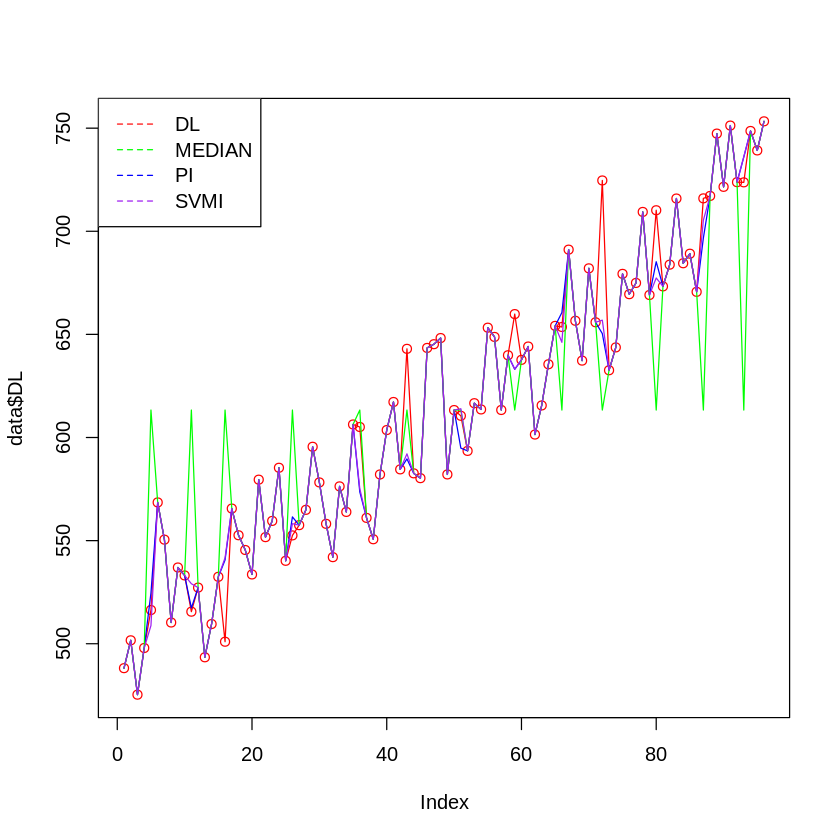

In [ ]:
plot(data$DL, type="o", col="red")
lines(data$PI, col="blue")
lines(data$MEDIAN, col="green")
lines(data$SVMI, col="PURPLE")
legend("topleft",
        legend=c("DL", "MEDIAN", "PI","SVMI"),
        col=c("red", "green", "blue","PURPLE"),
        lty=2)

In [ ]:
result_df <- data.frame(
  SVMI     = data_SVMI
)

head(result_df)

,SVMI
,<dbl>
1,488.1500
2,501.6600
3,475.3000
4,497.9300
5,508.7949
6,568.5200


In [ ]:
write_xlsx(result_df, "SVMI.xlsx")

In [ ]:
result_df <- data.frame(
  PI     = data_PI
)

head(result_df)

,Outstanding_Balance_Billions
,<dbl>
1,488.1500
2,501.6600
3,475.3000
4,497.9300
5,524.6111
6,568.5200


In [ ]:
write_xlsx(result_df, "PI.xlsx")

#Building SVMI Data



In [ ]:
DL_SVMI = read_xlsx('/content/SVMI.xlsx')
DL_SVMI

SVMI
<dbl>
488.1500
501.6600
475.3000
497.9300
508.7949
568.5200
550.4700
510.2900
536.9700


In [ ]:
DL_SVMI=ts(DL_SVMI,frequency=12, start=c(2017,1))

In [ ]:
print(DL_SVMI)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 488.1500 501.6600 475.3000 497.9300 508.7949 568.5200 550.4700 510.2900
2018 493.4200 509.5500 532.4500 541.6384 565.5500 552.6000 545.4500 533.5900
2019 540.2100 558.2210 557.4900 564.9200 595.5100 578.2200 558.1400 541.9800
2020 561.0200 550.6600 582.0800 603.6100 617.2200 584.5400 592.0745 582.6200
2021 582.0900 613.3100 613.9507 593.5000 616.6400 613.6000 653.2600 648.7700
2022 644.1200 601.4300 615.5400 635.5100 654.1300 646.1464 691.1000 656.6000
2023 632.6100 643.6800 679.3500 669.4900 674.9500 709.3800 669.1000 677.3441
2024 689.1200 670.6300 705.3909 717.1400 747.3700 721.5400 751.2600 723.8100
          Sep      Oct      Nov      Dec
2017 536.9700 533.1100 529.0904 527.2200
2018 579.5600 551.6800 559.5500 585.3300
2019 576.3000 563.9100 606.3200 575.2109
2020 580.2800 643.4400 645.2400 648.2300
2021 613.3400 639.8800 633.1576 637.6500
2022 637.2800 682.0300 655.8700 656.9003
2023 673.2700 683.81

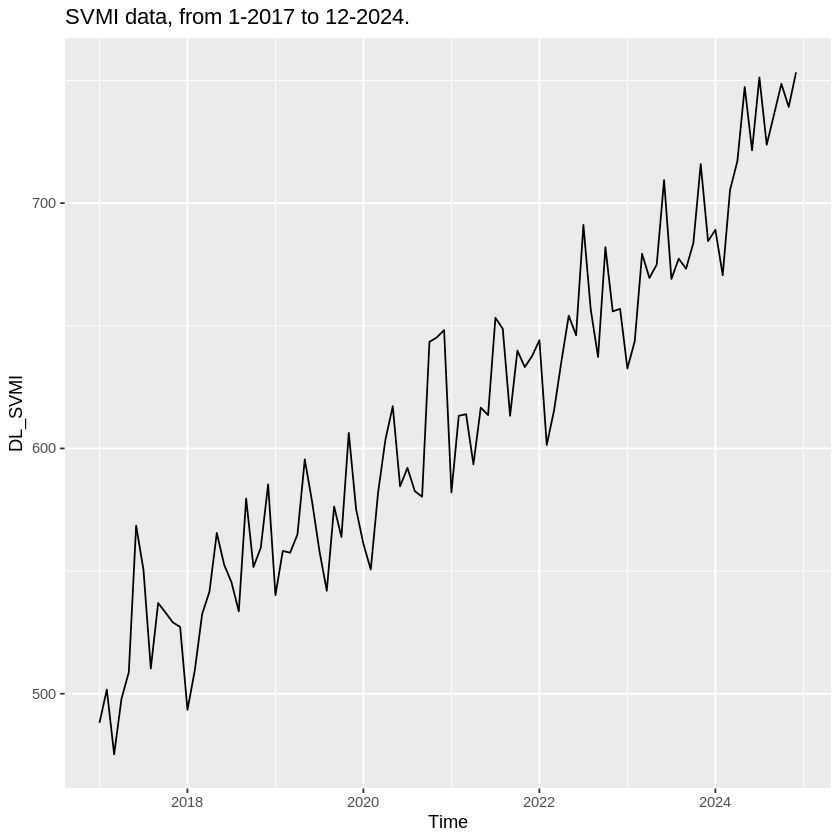

In [ ]:
autoplot(DL_SVMI) + ggtitle("SVMI data, from 1-2017 to 12-2024.")

##Check stationary with SVMI seasonal data

In [ ]:
adf_SVMI= tseries::adf.test(DL_SVMI)
print(adf_SVMI)
kpss_SVMI= tseries::kpss.test(DL_SVMI)
print(kpss_SVMI)


	Augmented Dickey-Fuller Test

data:  DL_SVMI
Dickey-Fuller = -3.5744, Lag order = 4, p-value = 0.03942
alternative hypothesis: stationary



Warning message in tseries::kpss.test(DL_SVMI):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  DL_SVMI
KPSS Level = 2.4048, Truncation lag parameter = 3, p-value = 0.01



In [ ]:
D1_SVMI= diff(DL_SVMI, differences=1)
print(D1_SVMI)

             Jan         Feb         Mar         Apr         May         Jun
2017              13.5100000 -26.3600000  22.6300000  10.8649465  59.7250535
2018 -33.8000000  16.1300000  22.9000000   9.1883690  23.9116310 -12.9500000
2019 -45.1200000  18.0109602  -0.7309602   7.4300000  30.5900000 -17.2900000
2020 -14.1909323 -10.3600000  31.4200000  21.5300000  13.6100000 -32.6800000
2021 -66.1400000  31.2200000   0.6406656 -20.4506656  23.1400000  -3.0400000
2022   6.4700000 -42.6900000  14.1100000  19.9700000  18.6200000  -7.9836405
2023 -24.2903032  11.0700000  35.6700000  -9.8600000   5.4600000  34.4300000
2024   4.6300000 -18.4900000  34.7608705  11.7491295  30.2300000 -25.8300000
             Jul         Aug         Sep         Oct         Nov         Dec
2017 -18.0500000 -40.1800000  26.6800000  -3.8600000  -4.0195815  -1.8704185
2018  -7.1500000 -11.8600000  45.9700000 -27.8800000   7.8700000  25.7800000
2019 -20.0800000 -16.1600000  34.3200000 -12.3900000  42.4100000 -31.1090677

In [ ]:
adf_SVMI= tseries::adf.test(D1_SVMI)
print(adf_SVMI)
kpss_SVMI= tseries::kpss.test(D1_SVMI)
print(kpss_SVMI)

Warning message in tseries::adf.test(D1_SVMI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_SVMI
Dickey-Fuller = -7.8409, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(D1_SVMI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_SVMI
KPSS Level = 0.027234, Truncation lag parameter = 3, p-value = 0.1



##D=1

##ACF: Q = 1, Q = 2


Autocorrelations of series ‘D1_SVMI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.347 -0.049 -0.095 -0.180  0.199  0.018  0.002 -0.017 -0.077 -0.092 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.143  0.097  0.012 -0.074  0.032 -0.230  0.184 -0.060  0.066  0.092 -0.208 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.079 -0.070  0.227 -0.087 -0.066  0.029 -0.136  0.114  0.031  0.000  0.065 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.178  0.018  0.084 -0.063  0.150 -0.122 -0.013 -0.077  0.170 -0.055  0.033 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.033 -0.161  0.089 -0.108  0.054  0.137 -0.007 -0.077 -0.019 -0.073  0.169 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.054 -0.015 -0.084  0.008  0.043 -0.005 

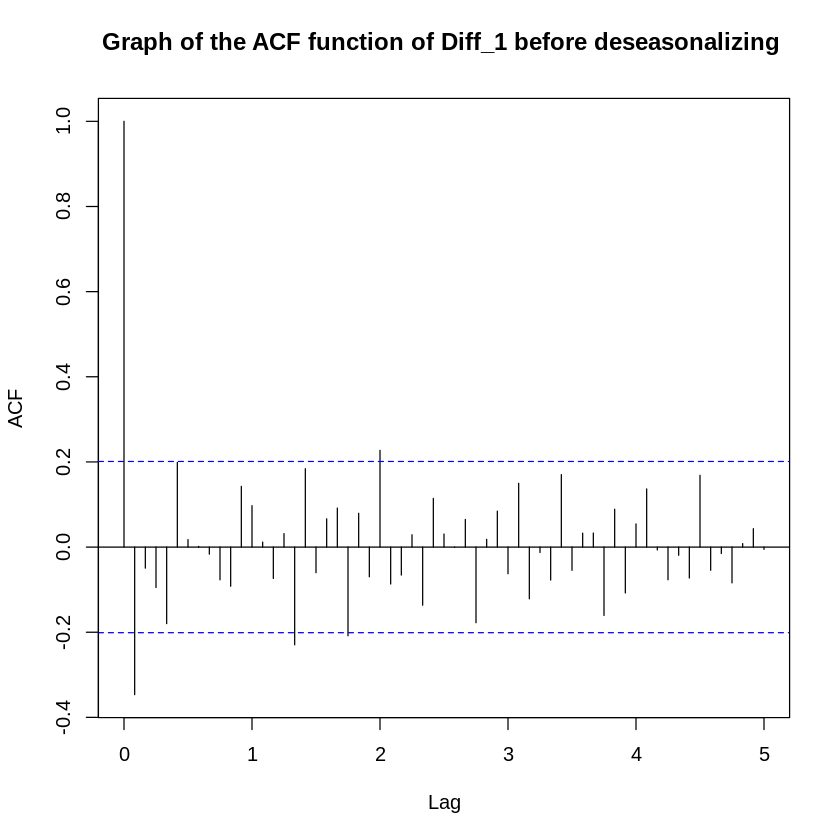

In [ ]:
acf(D1_SVMI,lag.max = 60,na.action = na.pass,main = "Graph of the ACF function of Diff_1 before deseasonalizing ")
acf(D1_SVMI, lag.max = 60, plot = FALSE)

##PACF: P = 1, P = 2



Partial autocorrelations of series ‘D1_SVMI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.347 -0.193 -0.215 -0.385 -0.128 -0.079 -0.091 -0.087 -0.095 -0.263 -0.124 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
 0.026  0.055 -0.002  0.213 -0.116  0.028 -0.083 -0.016  0.056 -0.027  0.000 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.111  0.183  0.001 -0.080  0.097 -0.053 -0.008  0.032  0.052  0.034 -0.039 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.042 -0.054 -0.119  0.007 -0.038 -0.088 -0.102  0.126 -0.066  0.012  0.055 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.055  0.017 -0.093 -0.100 -0.022  0.160  0.028 -0.002  0.036  0.098 -0.013 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.069 -0.052 -0.021  0.009 -0.005 

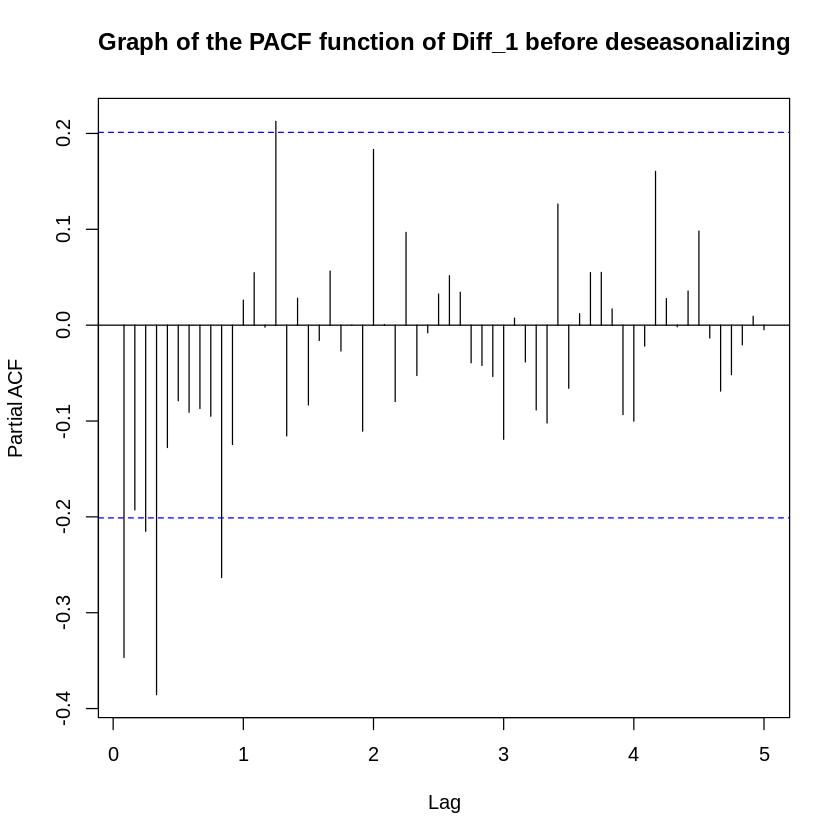

In [ ]:
pacf(D1_SVMI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function of Diff_1 before deseasonalizing")
pacf(D1_SVMI, lag.max = 60, plot = FALSE)

##Deseasonalizing SVMI data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2018,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2019,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2020,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2021,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2022,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2023,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955
2024,-20.533519,-22.300941,-4.933368,-1.751152,16.509798,4.578566,10.595058,-7.092744,-2.924406,8.809756,12.835997,6.206955


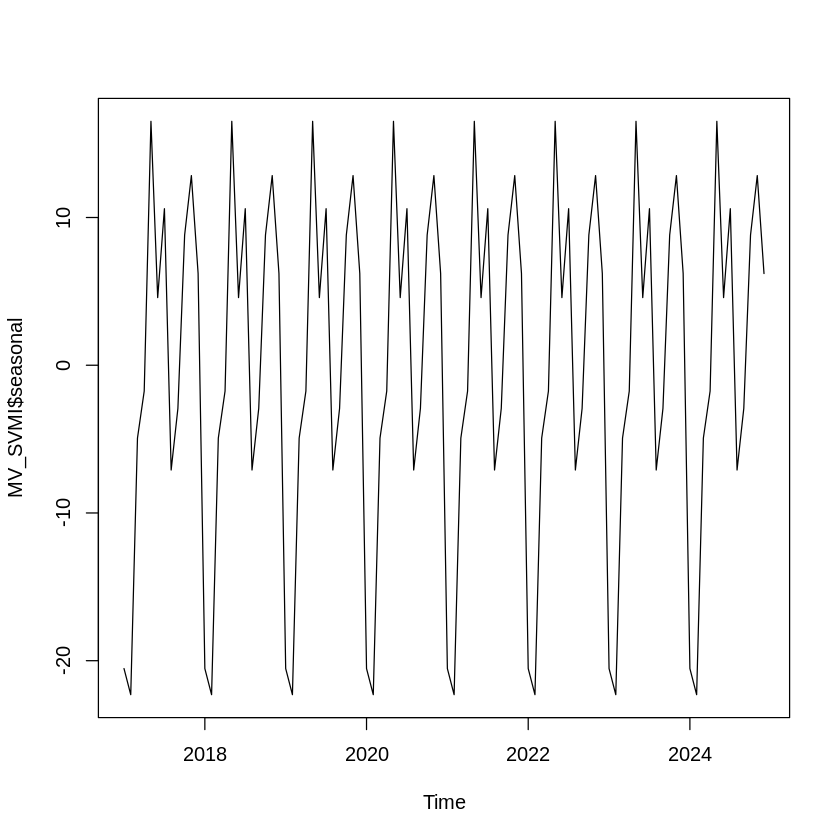

In [ ]:
MV_SVMI= decompose(DL_SVMI)
MV_SVMI$seasonal
plot(MV_SVMI$seasonal)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 508.6835 523.9609 480.2334 499.6812 492.2851 563.9414 539.8749 517.3827
2018 513.9535 531.8509 537.3834 543.3895 549.0402 548.0214 534.8549 540.6827
2019 560.7435 580.5219 562.4234 566.6712 579.0002 573.6414 547.5449 549.0727
2020 581.5535 572.9609 587.0134 605.3612 600.7102 579.9614 581.4795 589.7127
2021 602.6235 635.6109 618.8840 595.2512 600.1302 609.0214 642.6649 655.8627
2022 664.6535 623.7309 620.4734 637.2612 637.6202 641.5678 680.5049 663.6927
2023 653.1435 665.9809 684.2834 671.2412 658.4402 704.8014 658.5049 684.4368
2024 709.6535 692.9309 710.3242 718.8912 730.8602 716.9614 740.6649 730.9027
          Sep      Oct      Nov      Dec
2017 539.8944 524.3002 516.2544 521.0130
2018 582.4844 542.8702 546.7140 579.1230
2019 579.2244 555.1002 593.4840 569.0040
2020 583.2044 634.6302 632.4040 642.0230
2021 616.2644 631.0702 620.3216 631.4430
2022 640.2044 673.2202 643.0340 650.6933
2023 676.1944 675.00

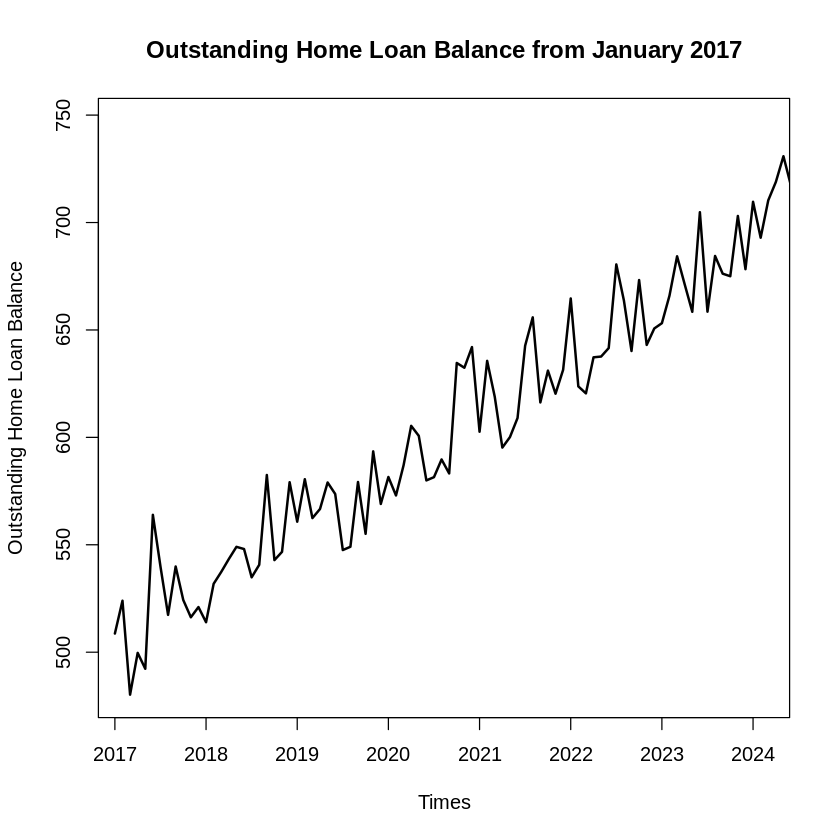

In [ ]:
KhuMua_SVMI = DL_SVMI - MV_SVMI$seasonal
plot(KhuMua_SVMI,
      xlim=c(2017.1,2024.12),
      lwd=2,
      ylab="Outstanding Home Loan Balance",xlab="Times",
      main="Outstanding Home Loan Balance from January 2017")
print(KhuMua_SVMI)

##Check stationary with SVMI non-seasonal data


In [ ]:
adf_KMSVMI= tseries::adf.test(KhuMua_SVMI)
print(adf_KMSVMI)
kpss_KMSVMI= tseries::kpss.test(KhuMua_SVMI)
print(kpss_KMSVMI)


	Augmented Dickey-Fuller Test

data:  KhuMua_SVMI
Dickey-Fuller = -3.4303, Lag order = 4, p-value = 0.0541
alternative hypothesis: stationary



Warning message in tseries::kpss.test(KhuMua_SVMI):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  KhuMua_SVMI
KPSS Level = 2.4224, Truncation lag parameter = 3, p-value = 0.01



In [ ]:
d1_SVMI= diff(KhuMua_SVMI, differences=1)
print(d1_SVMI)

             Jan         Feb         Mar         Apr         May         Jun
2017              15.2774223 -43.7275726  19.4477836  -7.3960033  71.6562854
2018  -7.0595259  17.8974223   5.5324274   6.0061525   5.6506812  -1.0187681
2019 -18.3795259  19.7783826 -18.0985328   4.2477836  12.3290502  -5.3587681
2020  12.5495418  -8.5925777  14.0524274  18.3477836  -4.6509498 -20.7487681
2021 -39.3995259  32.9874223 -16.7269070 -23.6328820   4.8790502   8.8912319
2022  33.2104741 -40.9225777  -3.2575726  16.7877836   0.3590502   3.9475914
2023   2.4501709  12.8374223  18.3024274 -13.0422164 -12.8009498  46.3612319
2024  31.3704741 -16.7225777  17.3932979   8.5669131  11.9690502 -13.8987681
             Jul         Aug         Sep         Oct         Nov         Dec
2017 -24.0664923 -22.4921979  22.5116618 -15.5941615  -8.0458226   4.7586229
2018 -13.1664923   5.8278021  41.8016618 -39.6141615   3.8437589  32.4090414
2019 -26.0964923   1.5278021  30.1516618 -24.1241615  38.3837589 -24.4800263

In [ ]:
adf_KMSVMI= tseries::adf.test(d1_SVMI)
print(adf_KMSVMI)
kpss_KMSVMI= tseries::kpss.test(d1_SVMI)
print(kpss_KMSVMI)

Warning message in tseries::adf.test(d1_SVMI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d1_SVMI
Dickey-Fuller = -7.2221, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(d1_SVMI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  d1_SVMI
KPSS Level = 0.036684, Truncation lag parameter = 3, p-value = 0.1



##d=1

##ACF: q = 1, q = 3


Autocorrelations of series ‘d1_SVMI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.483  0.020  0.019 -0.146  0.119 -0.032 -0.049  0.053  0.044 -0.094 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.165 -0.115 -0.017 -0.007  0.143 -0.191  0.073 -0.063  0.009  0.144 -0.100 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.089 -0.079  0.068 -0.141  0.039  0.085 -0.070  0.023  0.014 -0.029  0.067 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.056 -0.017  0.163 -0.265  0.128 -0.036 -0.032  0.058  0.089 -0.062 -0.015 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.007 -0.053  0.097 -0.099 -0.027  0.082  0.069 -0.122  0.097 -0.139  0.148 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.034 -0.063  0.030 -0.055  0.083 -0.079 

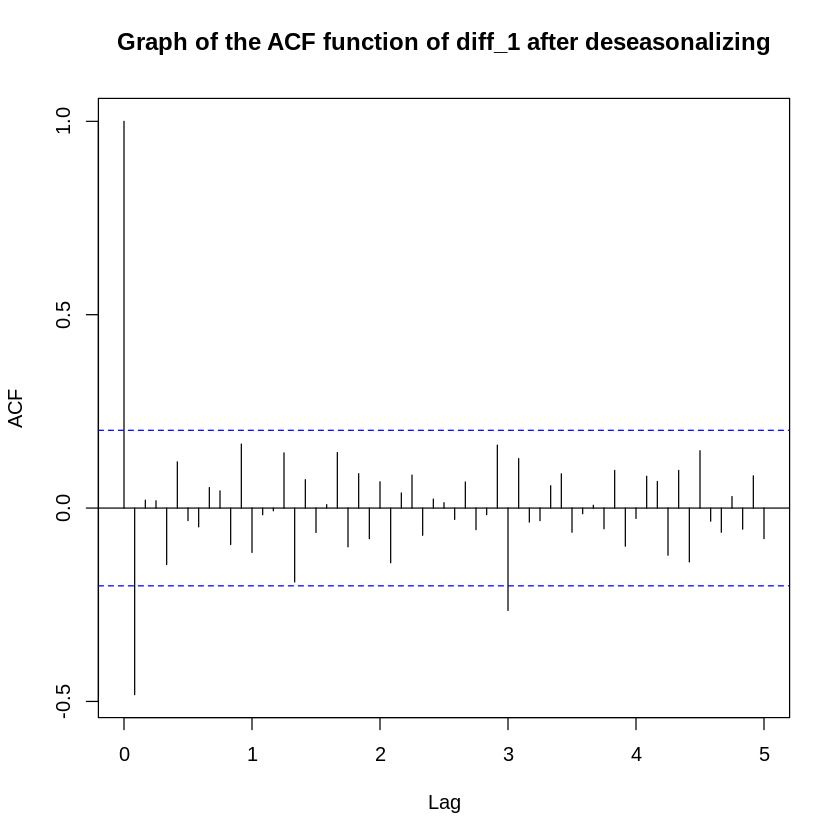

In [ ]:
acf(d1_SVMI,lag.max = 60,na.action = na.pass,main = "Graph of the ACF function of diff_1 after deseasonalizing")
acf(d1_SVMI, lag.max = 60, plot = FALSE)

##PACF: p = 1, p = 2



Partial autocorrelations of series ‘d1_SVMI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.483 -0.277 -0.144 -0.282 -0.161 -0.132 -0.198 -0.176 -0.045 -0.151  0.058 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
 0.041 -0.002 -0.072  0.235 -0.005 -0.025 -0.113 -0.137 -0.063 -0.033  0.051 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
 0.001  0.168  0.004 -0.098  0.136  0.084 -0.028 -0.025 -0.028 -0.016 -0.023 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.023  0.157 -0.034 -0.016 -0.066 -0.120 -0.099  0.076 -0.026 -0.066 -0.009 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.044  0.060  0.076 -0.040 -0.047  0.120  0.028 -0.008 -0.079  0.062 -0.038 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.038  0.004  0.009  0.074 -0.008 

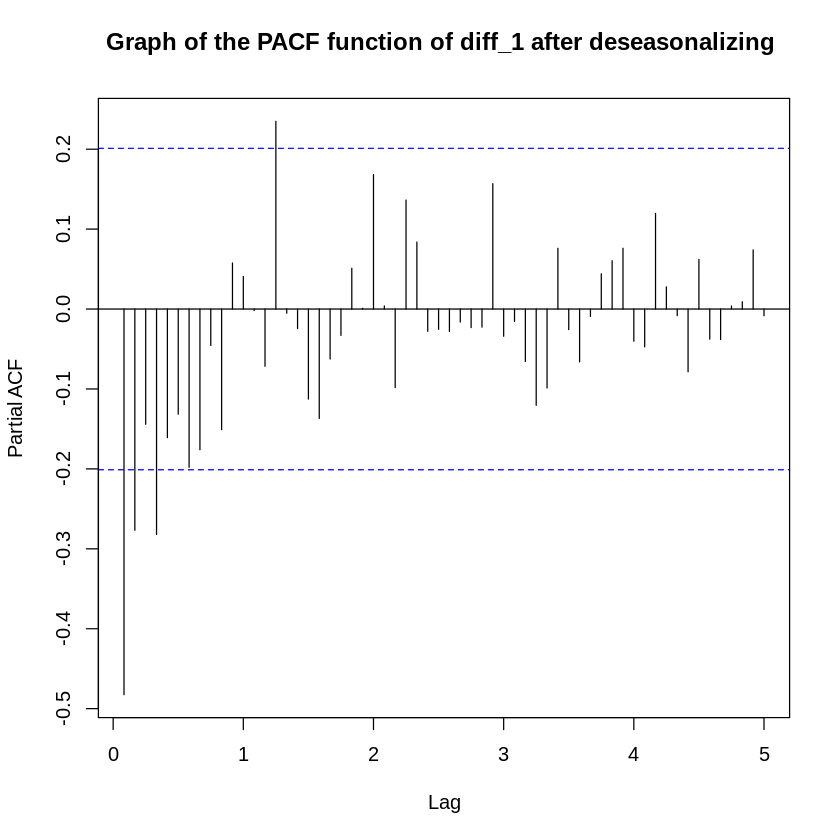

In [ ]:
pacf(d1_SVMI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function of diff_1 after deseasonalizing ")
pacf(d1_SVMI, lag.max = 60, plot = FALSE)

##Comparing Models

In [ ]:
lambda_choice <- 'auto'

In [ ]:
MH1_SVMI  <- Arima(DL_SVMI, order=c(1,1,1), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH2_SVMI  <- Arima(DL_SVMI, order=c(1,1,3), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH3_SVMI  <- Arima(DL_SVMI, order=c(2,1,1), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH4_SVMI  <- Arima(DL_SVMI, order=c(2,1,3), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH5_SVMI  <- Arima(DL_SVMI, order=c(1,1,1), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH6_SVMI  <- Arima(DL_SVMI, order=c(1,1,3), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH7_SVMI  <- Arima(DL_SVMI, order=c(2,1,1), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH8_SVMI  <- Arima(DL_SVMI, order=c(2,1,3), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH9_SVMI  <- Arima(DL_SVMI, order=c(1,1,1), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH10_SVMI  <- Arima(DL_SVMI, order=c(1,1,3), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH11_SVMI  <- Arima(DL_SVMI, order=c(2,1,1), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH12_SVMI  <- Arima(DL_SVMI, order=c(2,1,3), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH13_SVMI  <- Arima(DL_SVMI, order=c(1,1,1), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH14_SVMI  <- Arima(DL_SVMI, order=c(1,1,3), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH15_SVMI  <- Arima(DL_SVMI, order=c(2,1,1), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH16_SVMI  <- Arima(DL_SVMI, order=c(2,1,3), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

##Checking AIC, BIC

In [ ]:
AIC(MH1_SVMI,MH2_SVMI,MH3_SVMI,MH4_SVMI,MH5_SVMI,MH6_SVMI,MH7_SVMI,MH8_SVMI,MH10_SVMI,MH11_SVMI,MH12_SVMI,MH14_SVMI,MH16_SVMI)
BIC(MH1_SVMI,MH2_SVMI,MH3_SVMI,MH4_SVMI,MH5_SVMI,MH6_SVMI,MH7_SVMI,MH8_SVMI,MH10_SVMI,MH11_SVMI,MH12_SVMI,MH14_SVMI,MH16_SVMI)

,df,AIC
,<dbl>,<dbl>
MH1_SVMI,5,931.6148
MH2_SVMI,7,935.4609
MH3_SVMI,6,933.5295
MH4_SVMI,8,934.6344
MH5_SVMI,6,931.5828
MH6_SVMI,8,933.5612
MH7_SVMI,7,933.5722
MH8_SVMI,9,931.6439
MH10_SVMI,8,935.0945


,df,BIC
,<dbl>,<dbl>
MH1_SVMI,5,943.7090
MH2_SVMI,7,952.3928
MH3_SVMI,6,948.0425
MH4_SVMI,8,953.9852
MH5_SVMI,6,946.0959
MH6_SVMI,8,952.9120
MH7_SVMI,7,950.5040
MH8_SVMI,9,953.4135
MH10_SVMI,8,954.4452


##Choose SARIMA MH1_SVMI

In [ ]:
Box.test(MH1_SVMI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH1_SVMI$residuals
X-squared = 16.802, df = 20, p-value = 0.6658


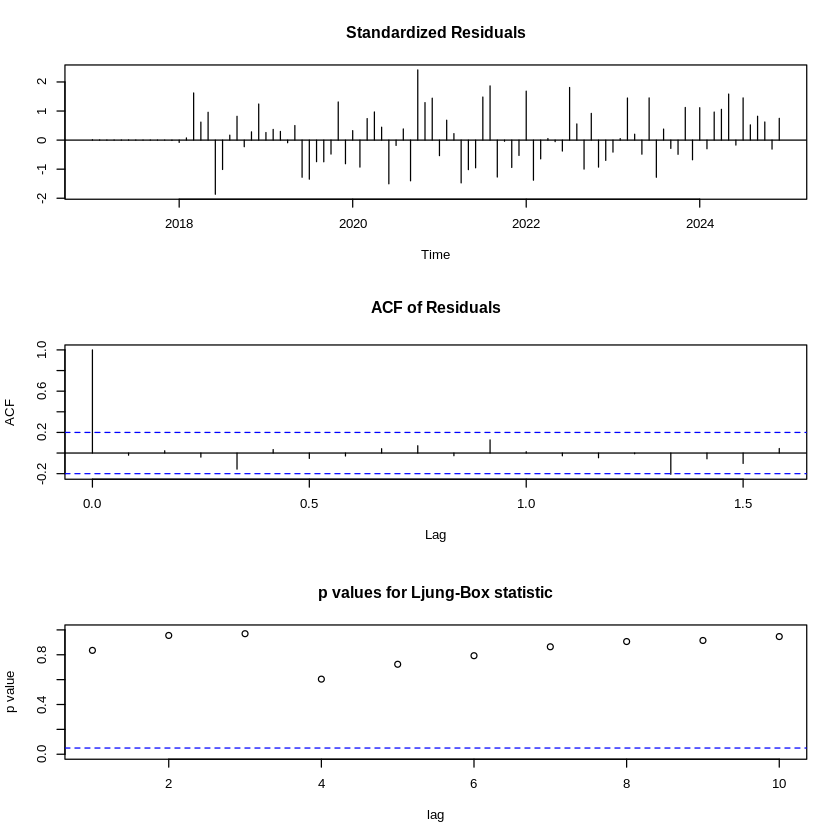


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[12]
Q* = 12.95, df = 15, p-value = 0.6062

Model df: 4.   Total lags used: 19



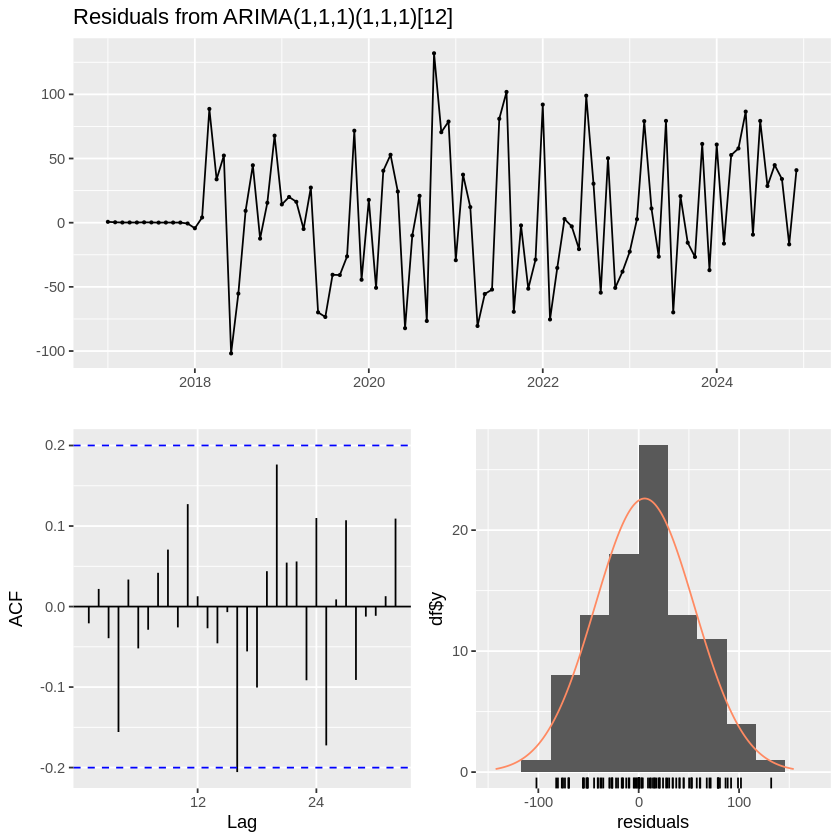

In [ ]:
tsdiag(MH1_SVMI)
checkresiduals(MH1_SVMI)

##Choose SARIMA MH5_SVMI

In [ ]:
Box.test(MH5_SVMI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH5_SVMI$residuals
X-squared = 20.612, df = 20, p-value = 0.4202


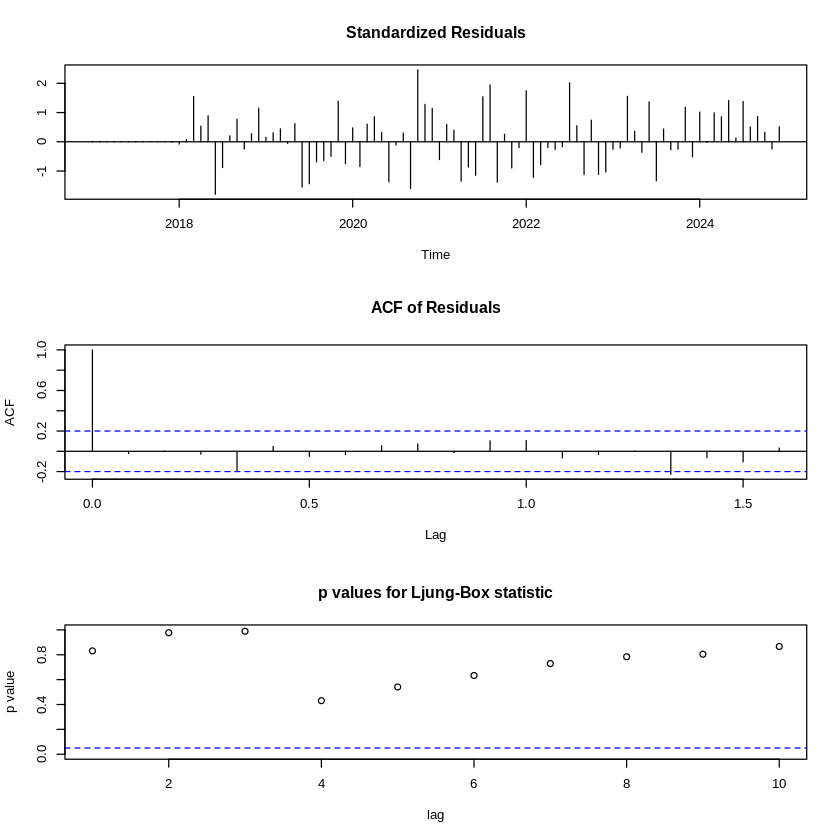


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,2)[12]
Q* = 16.274, df = 14, p-value = 0.2969

Model df: 5.   Total lags used: 19



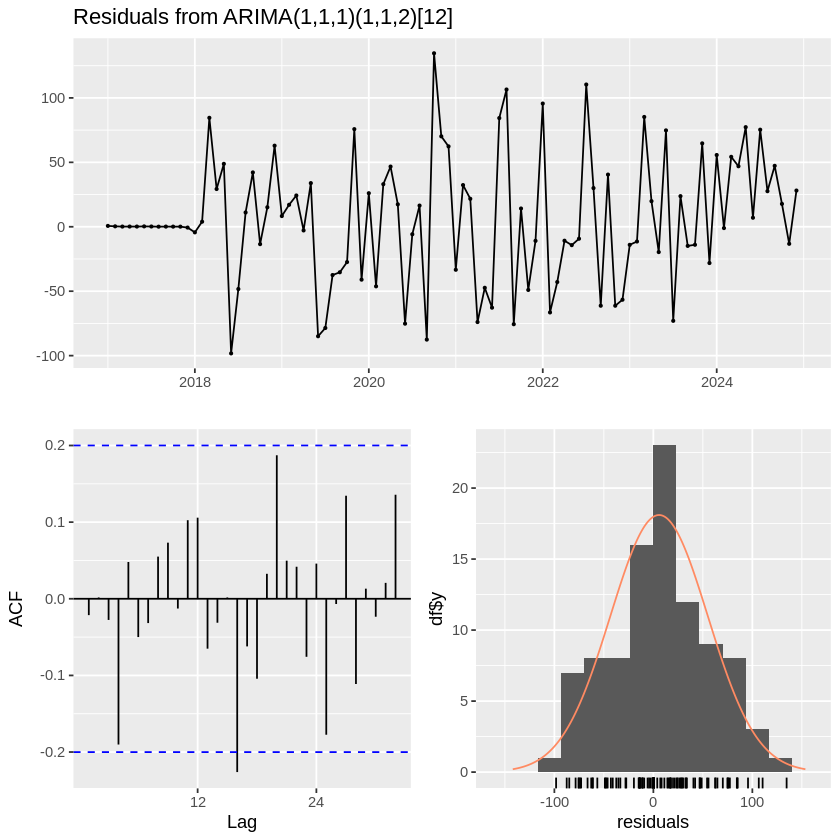

In [ ]:
tsdiag(MH5_SVMI)
checkresiduals(MH5_SVMI)

## SARIMA MH8_SVMI --> Out

In [ ]:
Box.test(MH8_SVMI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH8_SVMI$residuals
X-squared = 19.778, df = 20, p-value = 0.4719


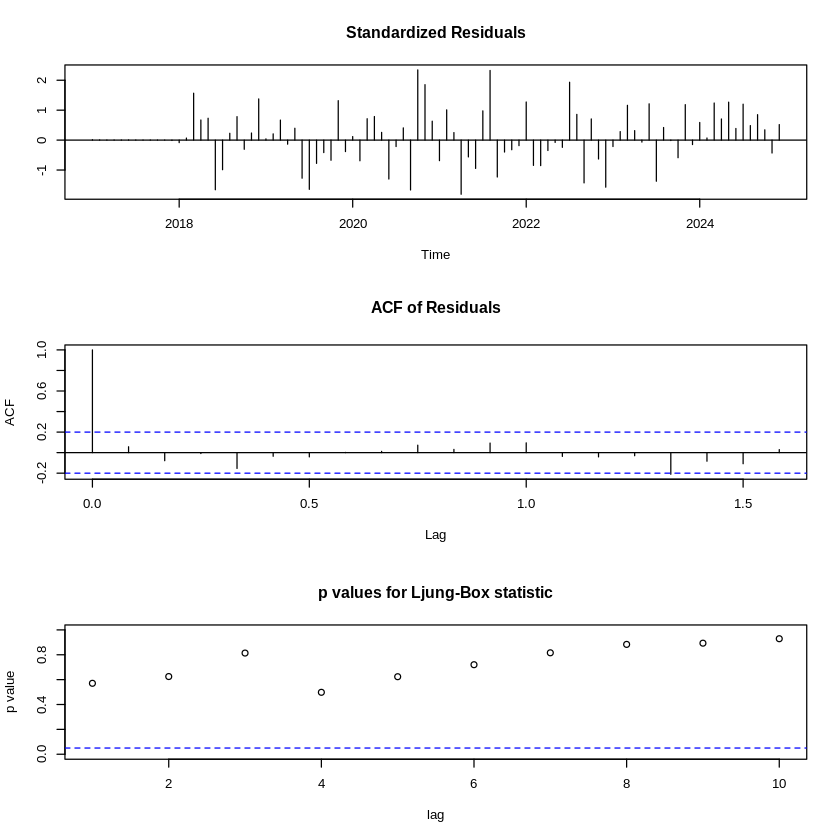


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)(1,1,2)[12]
Q* = 14.344, df = 11, p-value = 0.2145

Model df: 8.   Total lags used: 19



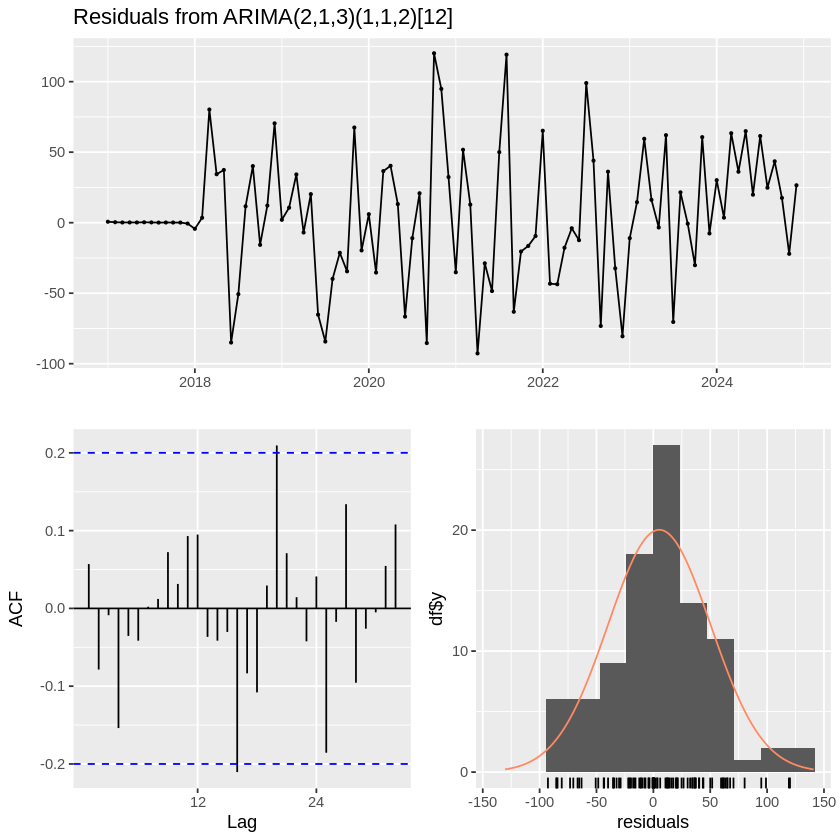

In [ ]:
tsdiag(MH8_SVMI)
checkresiduals(MH8_SVMI)

##Accuracy & 6-month forecast with SARIMA MH1_SVMI


In [ ]:
predMH1_SVMI <- forecast::forecast(MH1_SVMI, h = length(test))

In [ ]:

metrics <- function(actual, pred) {
            mae <- mean(abs(actual - pred))
            rmse <- sqrt(mean((actual - pred)^2))
            mape <- 100 * mean(abs((actual - pred) / actual))
            c(MAE = mae, RMSE = rmse, MAPE = mape)}

manual_metrics1_SVMI <- metrics(test, predMH1_SVMI$mean)

print(manual_metrics1_SVMI)

      MAE      RMSE      MAPE 
21.807316 28.002643  2.825773 


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       719.1929 694.0636 744.1776 680.7000 757.3473
Feb 2025       720.1515 694.6621 745.4922 681.1063 758.8488
Mar 2025       734.4071 708.7777 759.8891 695.1482 773.3210
Apr 2025       741.9919 716.1900 767.6459 702.4690 781.1688
May 2025       761.2071 735.3024 786.9664 721.5282 800.5460
Jun 2025       759.8553 733.7305 785.8321 719.8386 799.5257

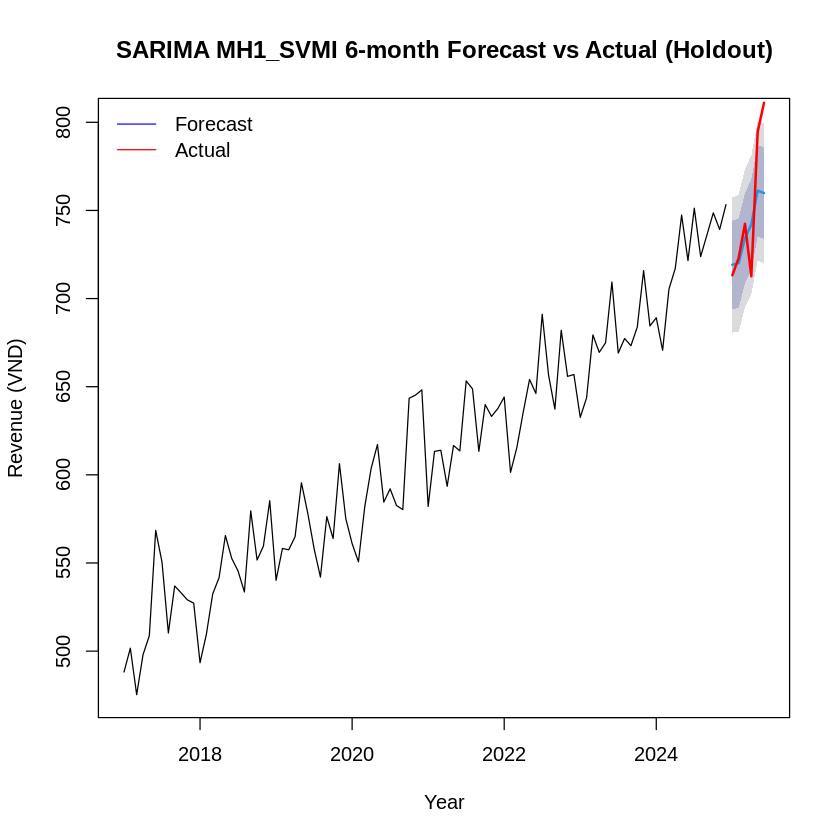

In [ ]:
predMH1_SVMI = forecast::forecast(MH1_SVMI, h = 6)

plot(predMH1_SVMI, main = "SARIMA MH1_SVMI 6-month Forecast vs Actual (Holdout)",
     xlab = "Year", ylab = "Revenue (VND)")

lines(test, col = "red", lwd = 2)

legend("topleft", legend = c("Forecast", "Actual"),
       col = c("blue", "red"), lty = 1, bty = "n")

predMH1_SVMI

##Accuracy & 6-month forecast with SARIMA MH5_SVMI

In [ ]:
predMH5_SVMI <- forecast::forecast(MH5_SVMI, h = length(test))

In [ ]:
metrics <- function(actual, pred) {
            mae <- mean(abs(actual - pred))
            rmse <- sqrt(mean((actual - pred)^2))
            mape <- 100 * mean(abs((actual - pred) / actual))
            c(MAE = mae, RMSE = rmse, MAPE = mape)}

manual_metrics5_SVMI <- metrics(test, predMH5_SVMI$mean)

print(manual_metrics5_SVMI)

      MAE      RMSE      MAPE 
20.824139 27.874747  2.678033 


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       715.6463 690.9719 740.1805 677.8511 753.1134
Feb 2025       723.4060 698.2602 748.4077 684.8882 761.5867
Mar 2025       733.2605 707.9481 758.4288 694.4880 771.6960
Apr 2025       736.6418 711.1464 761.9918 697.5888 775.3546
May 2025       754.6338 729.0436 780.0811 715.4367 793.4963
Jun 2025       762.0549 736.3102 787.6563 722.6215 801.1529

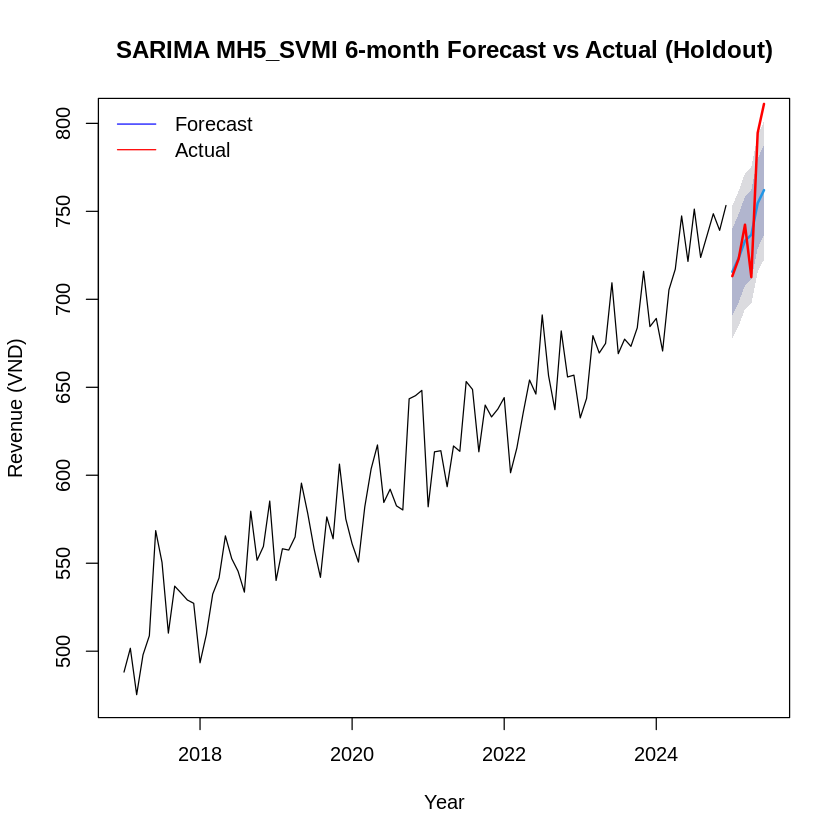

In [ ]:
predMH5_SVMI = forecast::forecast(MH5_SVMI, h = 6)

plot(predMH5_SVMI, main = "SARIMA MH5_SVMI 6-month Forecast vs Actual (Holdout)",
     xlab = "Year", ylab = "Revenue (VND)")

lines(test, col = "red", lwd = 2)

legend("topleft", legend = c("Forecast", "Actual"),
       col = c("blue", "red"), lty = 1, bty = "n")

predMH5_SVMI

##XGBOOST with MH1_SVMI

In [ ]:
#Installing essential libraries
install.packages(c( "xgboost","data.table","lubridate"))
library(xgboost)
library(data.table)
library(lubridate)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("xgboost", "data.table", "lubridate")):
“installation of package ‘xgboost’ had non-zero exit status”
Warning message in install.packages(c("xgboost", "data.table", "lubridate")):
“installation of package ‘xgboost’ had non-zero exit status”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
re_sarima_SVMI1 <- residuals(predMH1_SVMI)
re_sarima_SVMI1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,0.67387534,0.33062200,0.15429661,0.17064408,0.16367882,0.29193907,0.20206036,0.06996822,0.13338293,0.10961139,0.08876108,-0.62242953
2018,-4.34109194,4.07817797,88.64318176,33.79540706,52.29958409,-101.83398210,-55.25051399,9.26873149,44.73854990,-12.40478904,15.48809243,67.81149339
2019,14.23617910,20.04362631,16.28383650,-4.90943436,27.34724586,-69.85402190,-73.44068234,-40.57337726,-40.78246055,-26.23652694,71.68099523,-44.43678714
2020,17.76617932,-50.73284652,40.46111461,52.90982440,24.24943997,-82.18925899,-9.97400913,20.93316706,-76.56523516,131.99720149,70.49856518,78.79185847
2021,-29.22326490,37.41423081,12.16194673,-80.46445498,-55.54389304,-52.07857349,80.95073377,101.88597418,-69.42137385,-2.12848283,-51.41849430,-28.79270100
2022,92.02452143,-75.39682320,-35.26909714,2.87421160,-2.87842378,-20.58008950,98.94720435,30.36500420,-54.49119032,50.22151312,-50.79017997,-38.12312413
2023,-22.55056901,2.75101711,79.13704937,11.07372216,-26.46861082,79.31145816,-69.86669485,20.69905740,-15.58230759,-26.69910122,61.35956993,-36.99455228
2024,60.89140566,-16.27649519,52.71168698,57.85550197,86.55608026,-9.31925276,79.30779691,28.58528947,44.85134215,34.02627058,-16.88806328,40.89853762


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df_SVMI1 <- data.table(
  residual_SVMI1 = as.numeric(re_sarima_SVMI1)
)


In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df_SVMI1[, `:=`(
  lag1 = shift(residual_SVMI1, 1),
  lag2 = shift(residual_SVMI1, 2),
  lag3 = shift(residual_SVMI1, 3)
)]
df_SVMI1 <- na.omit(df_SVMI1)



In [ ]:
# Dữ liệu XGBoost
train_matrix <- as.matrix(df_SVMI1[, .(lag1, lag2, lag3)])
train_label <- df_SVMI1$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)



In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 5, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 300)
residual_forecast <- c()
lag_vals <- tail(re_sarima_SVMI1, 3)
for (i in 1:6) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast <- c(residual_forecast, pred)
  lag_vals <- c(lag_vals, pred)
}


In [ ]:
# SARIMA dự báo
sarima_pred_SVMI1 <- as.numeric(predMH1_SVMI$mean)
print(sarima_pred_SVMI1)


[1] 719.1929 720.1515 734.4071 741.9919 761.2071 759.8553


In [ ]:
# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast_SVMI1 <- sarima_pred_SVMI1 + residual_forecast


In [ ]:

# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-01-01"), by = "month", length.out = 6),
  SARIMA = sarima_pred_SVMI1,
  Residual = residual_forecast,
  Hybrid = hybrid_forecast_SVMI1
))

       Month   SARIMA  Residual   Hybrid
1 2025-01-01 719.1929  21.71065 740.9036
2 2025-02-01 720.1515  38.98716 759.1386
3 2025-03-01 734.4071  23.98032 758.3874
4 2025-04-01 741.9919 -68.07921 673.9127
5 2025-05-01 761.2071  16.83514 778.0422
6 2025-06-01 759.8553 -37.52914 722.3262


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


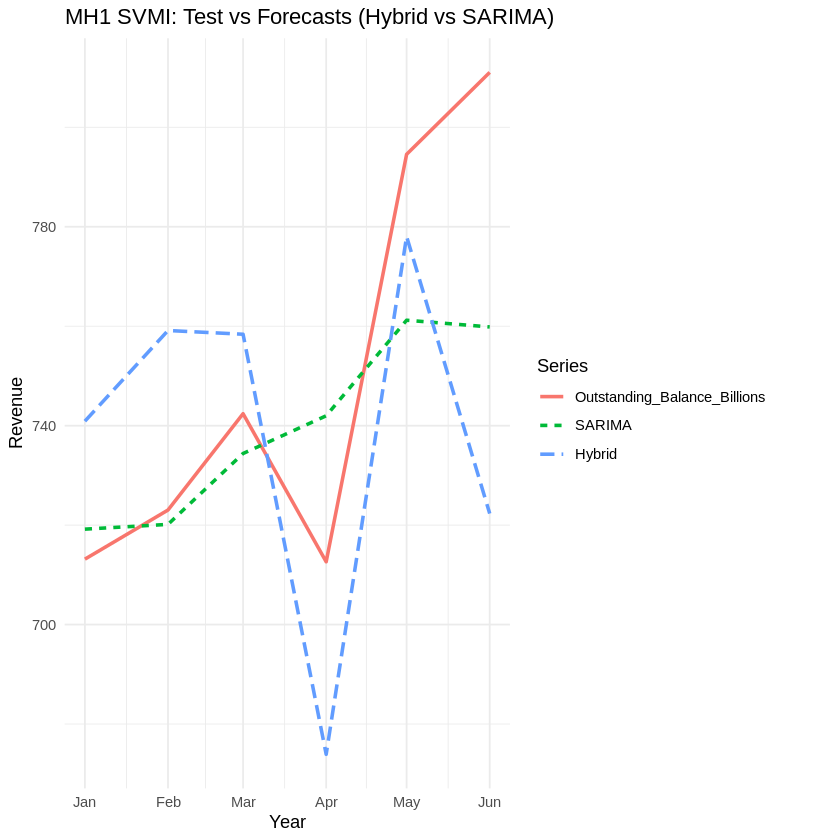

In [ ]:
Year <- seq.Date(from = as.Date("2025-01-01"),
                 to = as.Date("2025-06-01"),
                 by = "month")

df <- data.frame(
  Year = Year,
  Test = test,
  SARIMA = sarima_pred_SVMI1,
  Hybrid = hybrid_forecast_SVMI1
)

df <- as.data.table(df)
df_long <- melt(df, id.vars = "Year",
                variable.name = "Series",
                value.name = "Value")

ggplot(df_long, aes(x = Year, y = Value, color = Series, linetype = Series)) +
  geom_line(size = 1) +
  labs(title = "MH1 SVMI: Test vs Forecasts (Hybrid vs SARIMA)",
       x = "Year", y = "Revenue") +
  theme_minimal()


In [ ]:
predmhhybrid_SVMI1 <- forecast::forecast(hybrid_forecast_SVMI1, h = length(test))

##Accuracy with Hybrid MH1_SVMI

In [ ]:
metrics <- function(actual, pred) {
  # ép kiểu numeric để tránh lỗi frequency
  actual <- as.numeric(actual)
  pred <- as.numeric(pred)

  mae <- mean(abs(actual - pred))
  rmse <- sqrt(mean((actual - pred)^2))
  mape <- 100 * mean(abs((actual - pred) / actual))

  c(MAE = mae, RMSE = rmse, MAPE = mape)
}

manual_metrics_hybrid_SVMI1 <- metrics(test, predmhhybrid_SVMI1$mean)
print(manual_metrics_hybrid_SVMI1)

      MAE      RMSE      MAPE 
33.200000 40.189311  4.322374 


##XGBOOST with MH5_SVMI

In [ ]:
re_sarima_SVMI5 <- residuals(predMH5_SVMI)
re_sarima_SVMI5

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,0.67387531,0.33062196,0.15429659,0.17064407,0.16367881,0.29193905,0.20206033,0.06996821,0.13338292,0.10961137,0.08876104,-0.62242962
2018,-4.34108281,3.94303420,84.54623150,29.29498747,48.82155684,-98.26666332,-48.31443061,11.09750579,42.16418897,-13.48633486,15.11099985,62.92366602
2019,8.30782274,17.03888663,24.27220567,-2.84614341,33.87273611,-84.95400835,-78.55782941,-37.46319547,-35.31647425,-27.38371791,75.75549565,-41.03687509
2020,26.03824162,-46.22165831,33.02750772,46.70986627,17.38733882,-75.19721170,-5.82470245,16.45220914,-87.55057481,134.62450109,70.16820130,62.36439673
2021,-33.36068467,32.34827233,21.70777586,-73.93146682,-47.35028646,-62.77883433,84.34228508,106.50684751,-75.61445247,14.16539867,-49.02080097,-10.91920523
2022,95.61894042,-66.47704700,-42.90813743,-10.81635409,-14.26395424,-9.27124347,110.37300708,30.00698593,-61.27134193,40.48855398,-61.26785348,-56.61097914
2023,-14.01422648,-11.42609914,85.21170572,19.86698025,-19.64437027,74.78582045,-72.99180191,23.76651081,-14.85474858,-13.96873991,64.71274040,-28.14408358
2024,55.68636043,-1.01820880,54.26743030,46.95193772,77.29671394,7.01066650,75.32954371,27.61724857,47.28123767,17.74440378,-13.22894166,28.10443711


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df_SVMI5 <- data.table(
  residual_SVMI5 = as.numeric(re_sarima_SVMI5)
)


In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df_SVMI5[, `:=`(
  lag1 = shift(residual_SVMI5, 1),
  lag2 = shift(residual_SVMI5, 2),
  lag3 = shift(residual_SVMI5, 3)
)]
df_SVMI5 <- na.omit(df_SVMI5)



In [ ]:
# Dữ liệu XGBoost
train_matrix <- as.matrix(df_SVMI5[, .(lag1, lag2, lag3)])
train_label <- df_SVMI5$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)


In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 5, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 300)
residual_forecast_SVMI5 <- c()
lag_vals <- tail(re_sarima_SVMI5, 3)
for (i in 1:6) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)
  residual_forecast_SVMI5 <- c(residual_forecast_SVMI5, pred)
  lag_vals <- c(lag_vals, pred)
}


In [ ]:
length(residual_forecast_SVMI5)
print(residual_forecast_SVMI5)

[1] 6

[1] -10.984674  40.631748  -3.613548  15.269107 -31.765160  25.578274


In [ ]:
# SARIMA dự báo
sarima_pred_SVMI5 <- as.numeric(predMH5_SVMI$mean)
print(sarima_pred_SVMI5)


[1] 715.6463 723.4060 733.2605 736.6418 754.6338 762.0549


In [ ]:
# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast_SVMI5 <- sarima_pred_SVMI5 + residual_forecast_SVMI5


In [ ]:
# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-01-01"), by = "month", length.out = 6),
  SARIMA = sarima_pred_SVMI5,
  Residual = residual_forecast_SVMI5,
  Hybrid = hybrid_forecast_SVMI5
))

       Month   SARIMA   Residual   Hybrid
1 2025-01-01 715.6463 -10.984674 704.6616
2 2025-02-01 723.4060  40.631748 764.0377
3 2025-03-01 733.2605  -3.613548 729.6469
4 2025-04-01 736.6418  15.269107 751.9109
5 2025-05-01 754.6338 -31.765160 722.8687
6 2025-06-01 762.0549  25.578274 787.6332


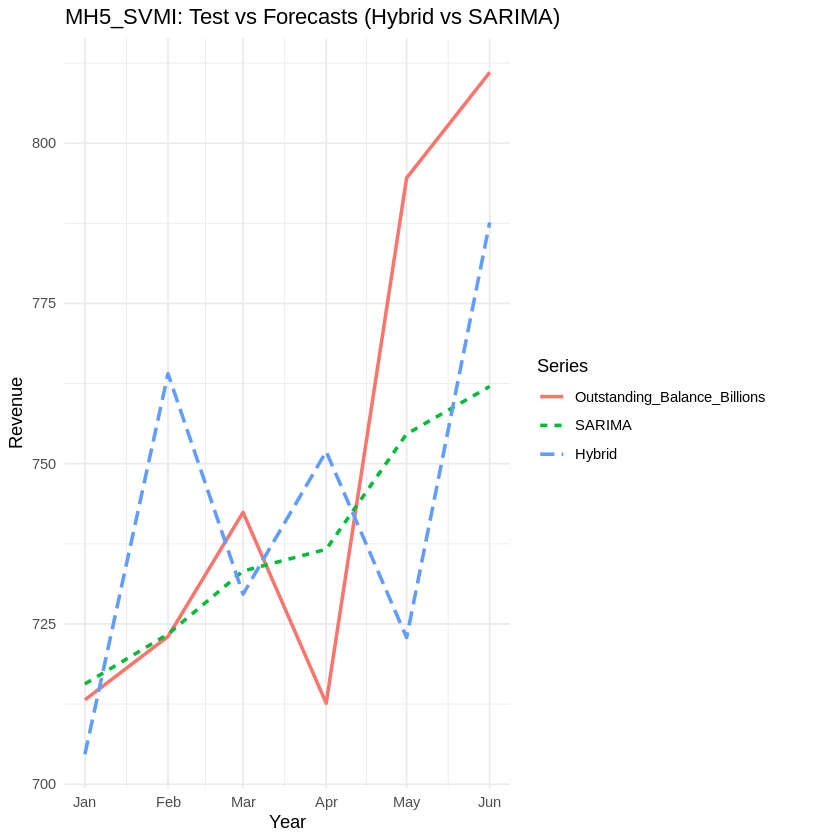

In [ ]:
Year <- seq.Date(from = as.Date("2025-01-01"),
                 to = as.Date("2025-06-01"),
                 by = "month")

df <- data.frame(
  Year = Year,
  Test = test,
  SARIMA = sarima_pred_SVMI5,
  Hybrid = hybrid_forecast_SVMI5
)

df <- as.data.table(df)
df_long <- melt(df, id.vars = "Year",
                variable.name = "Series",
                value.name = "Value")

ggplot(df_long, aes(x = Year, y = Value, color = Series, linetype = Series)) +
  geom_line(size = 1) +
  labs(title = "MH5_SVMI: Test vs Forecasts (Hybrid vs SARIMA)",
       x = "Year", y = "Revenue") +
  theme_minimal()

In [ ]:
predmhhybrid_SVMI5 <- forecast::forecast(hybrid_forecast_SVMI5, h = length(test))

##Accuracy with Hybrid MH5_SVMI

In [ ]:
metrics <- function(actual, pred) {
  # ép kiểu numeric để tránh lỗi frequency
  actual <- as.numeric(actual)
  pred <- as.numeric(pred)

  mae <- mean(abs(actual - pred))
  rmse <- sqrt(mean((actual - pred)^2))
  mape <- 100 * mean(abs((actual - pred) / actual))

  c(MAE = mae, RMSE = rmse, MAPE = mape)
}

manual_metrics_hybrid_SVMI5 <- metrics(test, predmhhybrid_SVMI5$mean)
print(manual_metrics_hybrid_SVMI5)

      MAE      RMSE      MAPE 
38.280754 40.106397  5.104445 


#Build PI Data

In [ ]:
DL_PI = read_xlsx('/content/PI.xlsx')
DL_PI

Outstanding_Balance_Billions
<dbl>
488.1500
501.6600
475.3000
497.9300
524.6111
568.5200
550.4700
510.2900
536.9700


In [ ]:
DL_PI=ts(DL_PI,frequency=12, start=c(2017,1))

In [ ]:
print(DL_PI)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 488.1500 501.6600 475.3000 497.9300 524.6111 568.5200 550.4700 510.2900
2018 493.4200 509.5500 532.4500 540.5990 565.5500 552.6000 545.4500 533.5900
2019 540.2100 561.5028 557.4900 564.9200 595.5100 578.2200 558.1400 541.9800
2020 561.0200 550.6600 582.0800 603.6100 617.2200 584.5400 589.6170 582.6200
2021 582.0900 613.3100 594.8566 593.5000 616.6400 613.6000 653.2600 648.7700
2022 644.1200 601.4300 615.5400 635.5100 654.1300 660.5903 691.1000 656.6000
2023 632.6100 643.6800 679.3500 669.4900 674.9500 709.3800 669.1000 685.2359
2024 689.1200 670.6300 696.7265 717.1400 747.3700 721.5400 751.2600 723.8100
          Sep      Oct      Nov      Dec
2017 536.9700 533.1100 517.3225 527.2200
2018 579.5600 551.6800 559.5500 585.3300
2019 576.3000 563.9100 606.3200 573.6309
2020 580.2800 643.4400 645.2400 648.2300
2021 613.3400 639.8800 633.0556 637.6500
2022 637.2800 682.0300 655.8700 650.3810
2023 673.2700 683.81

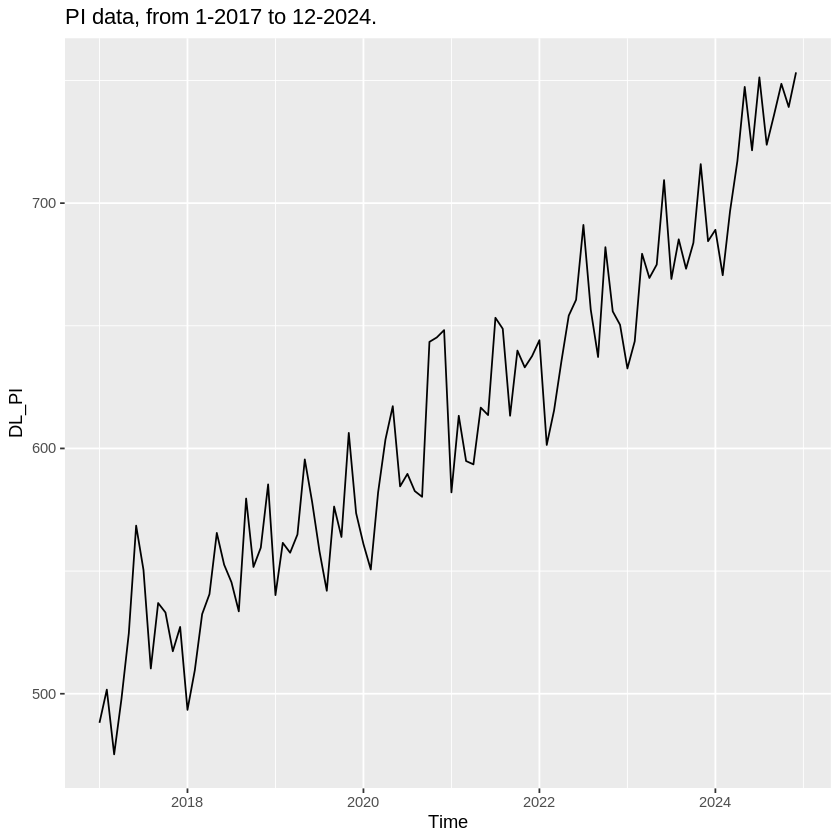

In [ ]:
autoplot(DL_PI) + ggtitle("PI data, from 1-2017 to 12-2024.")

In [ ]:
train <- window(dl, end = c(2024, 12))
test <- window(dl, start = c(2025, 1))
print(test)

        Jan    Feb    Mar    Apr    May    Jun
2025 713.16 723.04 742.41 712.63 794.57 811.05


##Check stationary with PI seasonal data

In [ ]:
adf_PI= tseries::adf.test(DL_PI)
print(adf_PI)
kpss_PI= tseries::kpss.test(DL_PI)
print(kpss_PI)


	Augmented Dickey-Fuller Test

data:  DL_PI
Dickey-Fuller = -3.6443, Lag order = 4, p-value = 0.03322
alternative hypothesis: stationary



Warning message in tseries::kpss.test(DL_PI):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  DL_PI
KPSS Level = 2.4012, Truncation lag parameter = 3, p-value = 0.01



In [ ]:
D1_PI= diff(DL_PI, differences=1)
print(D1_PI)

            Jan        Feb        Mar        Apr        May        Jun
2017             13.510000 -26.360000  22.630000  26.681105  43.908895
2018 -33.800000  16.130000  22.900000   8.148953  24.951047 -12.950000
2019 -45.120000  21.292849  -4.012849   7.430000  30.590000 -17.290000
2020 -12.610930 -10.360000  31.420000  21.530000  13.610000 -32.680000
2021 -66.140000  31.220000 -18.453430  -1.356570  23.140000  -3.040000
2022   6.470000 -42.690000  14.110000  19.970000  18.620000   6.460291
2023 -17.771047  11.070000  35.670000  -9.860000   5.460000  34.430000
2024   4.630000 -18.490000  26.096512  20.413488  30.230000 -25.830000
            Jul        Aug        Sep        Oct        Nov        Dec
2017 -18.050000 -40.180000  26.680000  -3.860000 -15.787500   9.897500
2018  -7.150000 -11.860000  45.970000 -27.880000   7.870000  25.780000
2019 -20.080000 -16.160000  34.320000 -12.390000  42.410000 -32.689070
2020   5.076977  -6.996977  -2.340000  63.160000   1.800000   2.990000
2021  

In [ ]:
adf_PI= tseries::adf.test(D1_PI)
print(adf_PI)
kpss_PI= tseries::kpss.test(D1_PI)
print(kpss_PI)

Warning message in tseries::adf.test(D1_PI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_PI
Dickey-Fuller = -7.9092, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(D1_PI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_PI
KPSS Level = 0.025951, Truncation lag parameter = 3, p-value = 0.1



##D=1

##ACF: Q = 1, Q = 2


Autocorrelations of series ‘D1_PI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.326 -0.038 -0.098 -0.220  0.187  0.047 -0.012 -0.017 -0.061 -0.125 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.166  0.103  0.014 -0.064  0.029 -0.252  0.177 -0.051  0.079  0.096 -0.214 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.055 -0.033  0.194 -0.049 -0.065 -0.011 -0.115  0.096  0.044  0.019  0.029 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.159  0.008  0.097 -0.061  0.133 -0.091 -0.028 -0.103  0.193 -0.055  0.066 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.008 -0.154  0.085 -0.116  0.061  0.137  0.000 -0.059 -0.039 -0.076  0.174 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.060 -0.004 -0.092 -0.010  0.056  0.008 

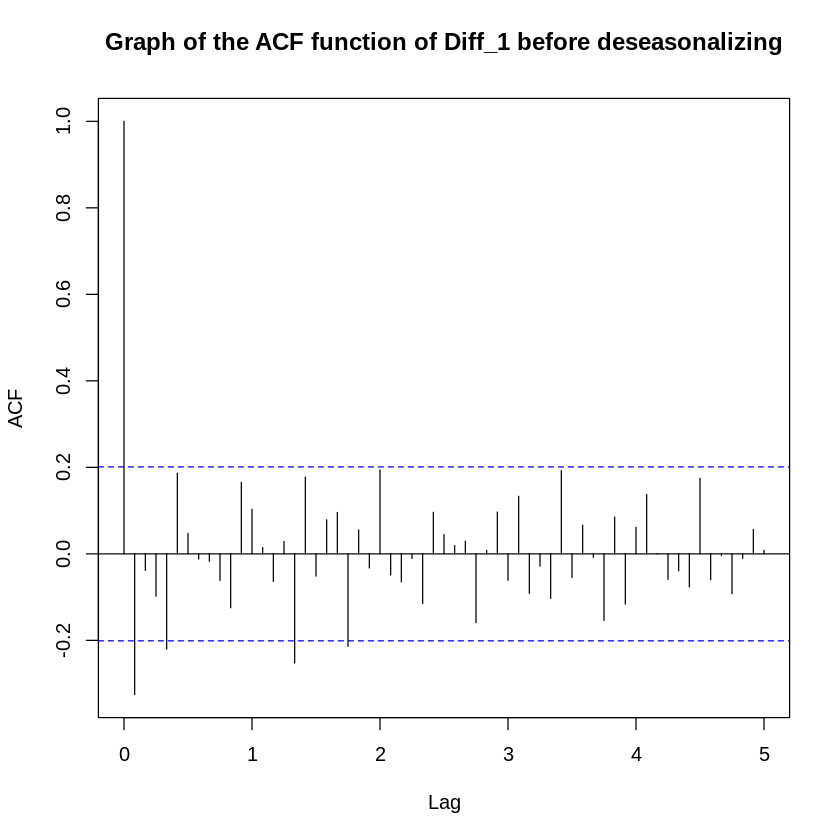

In [ ]:
acf(D1_PI,lag.max = 60,na.action = na.pass,main = "Graph of the ACF function of Diff_1 before deseasonalizing")
acf(D1_PI, lag.max = 60, plot = FALSE)

##PACF:P = 1, P = 2


Partial autocorrelations of series ‘D1_PI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.326 -0.161 -0.189 -0.394 -0.131 -0.048 -0.103 -0.130 -0.096 -0.283 -0.127 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
 0.035  0.049 -0.038  0.212 -0.131  0.006 -0.079  0.028  0.051 -0.032 -0.018 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.072  0.165  0.032 -0.086  0.084 -0.028  0.008  0.028  0.079  0.005 -0.050 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.049 -0.012 -0.126 -0.002 -0.024 -0.079 -0.170  0.165 -0.071  0.021  0.024 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.094 -0.011 -0.104 -0.106  0.003  0.100  0.087 -0.042  0.028  0.118 -0.006 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.096 -0.021 -0.039  0.046 -0.006 

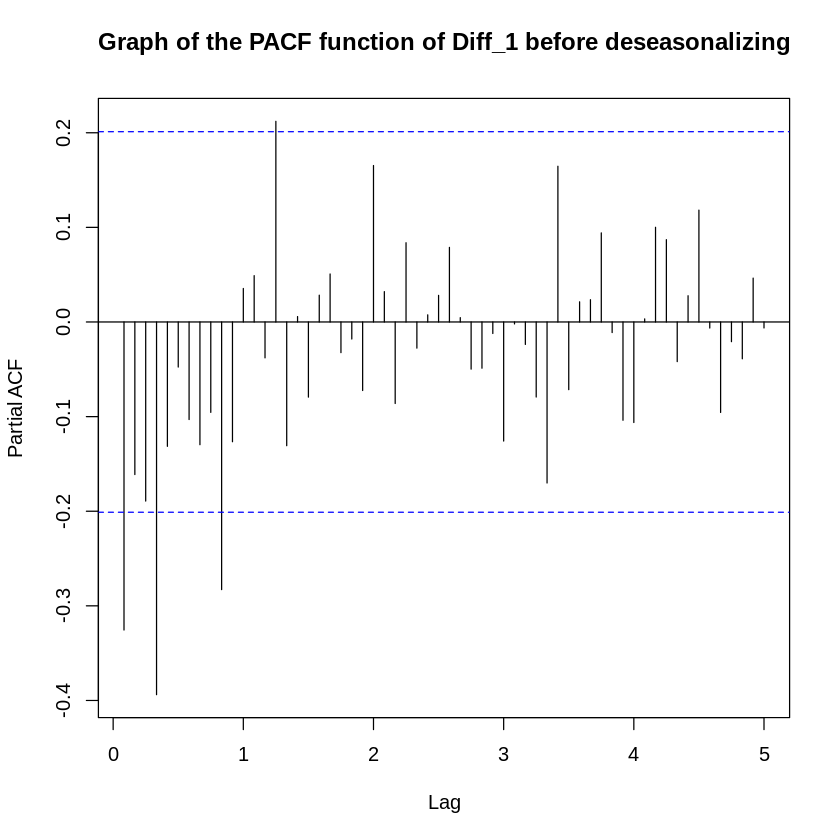

In [ ]:
pacf(D1_PI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function of Diff_1 before deseasonalizing")
pacf(D1_PI, lag.max = 60, plot = FALSE)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2018,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2019,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2020,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2021,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2022,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2023,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599
2024,-20.119839,-21.418420,-8.483854,-1.483304,16.856087,6.918227,10.366223,-5.843102,-2.750587,9.035148,11.459821,5.463599


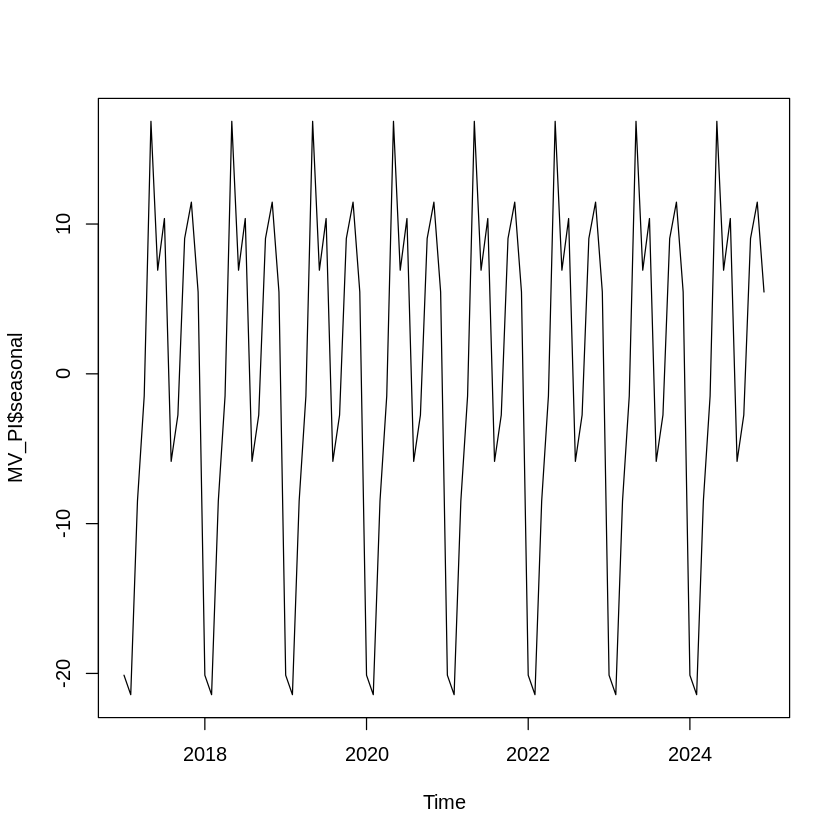

In [ ]:
MV_PI= decompose(DL_PI)
MV_PI$seasonal
plot(MV_PI$seasonal)

##Deseasonalizing PI data

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017 508.2698 523.0784 483.7839 499.4133 507.7550 561.6018 540.1038 516.1331
2018 513.5398 530.9684 540.9339 542.0823 548.6939 545.6818 535.0838 539.4331
2019 560.3298 582.9213 565.9739 566.4033 578.6539 571.3018 547.7738 547.8231
2020 581.1398 572.0784 590.5639 605.0933 600.3639 577.6218 579.2508 588.4631
2021 602.2098 634.7284 603.3404 594.9833 599.7839 606.6818 642.8938 654.6131
2022 664.2398 622.8484 624.0239 636.9933 637.2739 653.6721 680.7338 662.4431
2023 652.7298 665.0984 687.8339 670.9733 658.0939 702.4618 658.7338 691.0790
2024 709.2398 692.0484 705.2104 718.6233 730.5139 714.6218 740.8938 729.6531
          Sep      Oct      Nov      Dec
2017 539.7206 524.0749 505.8627 521.7564
2018 582.3106 542.6449 548.0902 579.8664
2019 579.0506 554.8749 594.8602 568.1673
2020 583.0306 634.4049 633.7802 642.7664
2021 616.0906 630.8449 621.5958 632.1864
2022 640.0306 672.9949 644.4102 644.9174
2023 676.0206 674.77

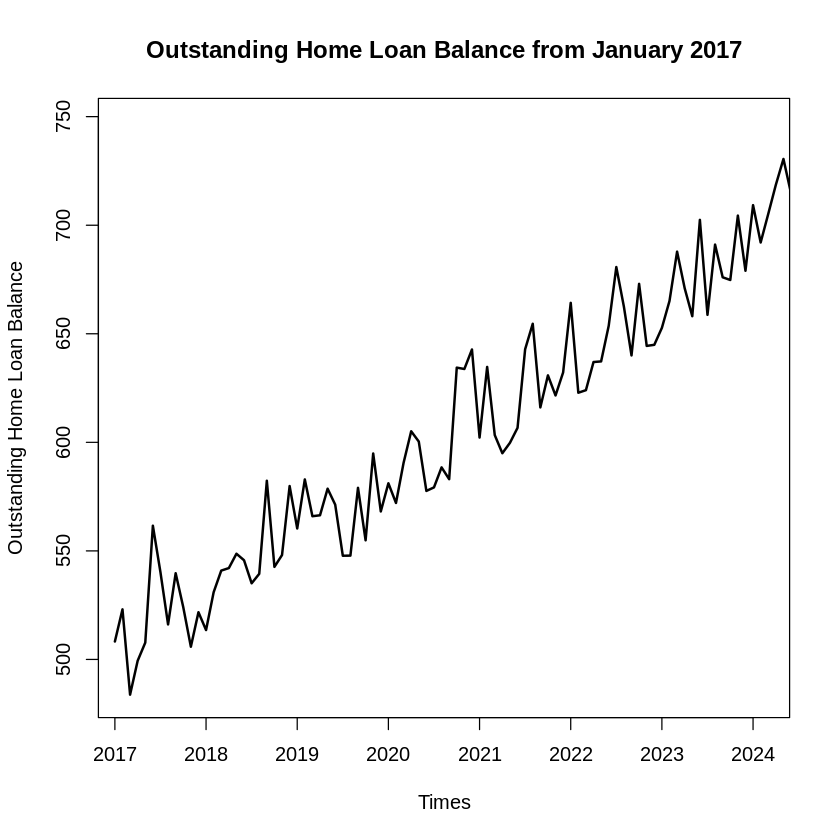

In [ ]:
KhuMua_PI = DL_PI - MV_PI$seasonal
plot(KhuMua_PI,
      xlim=c(2017.1,2024.12),
      lwd=2,
      ylab="Outstanding Home Loan Balance",xlab="Times",
      main="Outstanding Home Loan Balance from January 2017")
print(KhuMua_PI)

##Check stationary with PI non-seasonal data

In [ ]:
adf_KMPI= tseries::adf.test(KhuMua_PI)
print(adf_KMPI)
kpss_KMPI= tseries::kpss.test(KhuMua_PI)
print(kpss_KMPI)


	Augmented Dickey-Fuller Test

data:  KhuMua_PI
Dickey-Fuller = -3.6683, Lag order = 4, p-value = 0.03109
alternative hypothesis: stationary



Warning message in tseries::kpss.test(KhuMua_PI):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  KhuMua_PI
KPSS Level = 2.4236, Truncation lag parameter = 3, p-value = 0.01



In [ ]:
d1_PI= diff(KhuMua_PI, differences=1)
print(d1_PI)

              Jan          Feb          Mar          Apr          May
2017               14.80858112 -39.29456589  15.62944989   8.34171408
2018  -8.21656285  17.42858112   9.96543411   1.14840338   6.61165594
2019 -19.53656285  22.59142996 -16.94741472   0.42944989  12.25060943
2020  12.97250692  -9.06141888  18.48543411  14.52944989  -4.72939057
2021 -40.55656285  32.51858112 -31.38799612  -8.35711987   4.80060943
2022  32.05343715 -41.39141888   1.17543411  12.96944989   0.28060943
2023   7.81239064  12.36858112  22.73543411 -16.86055011 -12.87939057
2024  30.21343715 -17.19141888  13.16194574  13.41293827  11.89060943
              Jun          Jul          Aug          Sep          Oct
2017  53.84675561 -21.49799586 -23.97067553  23.58748477 -15.64573505
2018  -3.01213974 -10.59799586   4.34932447  42.87748477 -39.66573505
2019  -7.35213974 -23.52799586   0.04932447  31.22748477 -24.17573505
2020 -22.74213974   1.62898089   9.21234773  -5.43251523  51.37426495
2021   6.89786026  3

In [ ]:
adf_KMPI= tseries::adf.test(d1_PI)
print(adf_KMPI)
kpss_KMPI= tseries::kpss.test(d1_PI)
print(kpss_KMPI)

Warning message in tseries::adf.test(d1_PI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d1_PI
Dickey-Fuller = -7.4082, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(d1_PI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  d1_PI
KPSS Level = 0.035825, Truncation lag parameter = 3, p-value = 0.1



##d = 1

##ACF: q = 1, q = 3


Autocorrelations of series ‘d1_PI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.469  0.022  0.028 -0.176  0.103 -0.007 -0.073  0.077  0.068 -0.130 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.170 -0.098 -0.025 -0.009  0.153 -0.210  0.075 -0.078  0.020  0.173 -0.102 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.066 -0.054  0.031 -0.108  0.032  0.050 -0.025 -0.002  0.014 -0.016  0.045 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.027 -0.024  0.163 -0.262  0.104 -0.024 -0.037  0.045  0.123 -0.083  0.018 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.031 -0.047  0.111 -0.114 -0.020  0.077  0.058 -0.093  0.085 -0.143  0.160 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.053 -0.043  0.020 -0.065  0.091 -0.067 

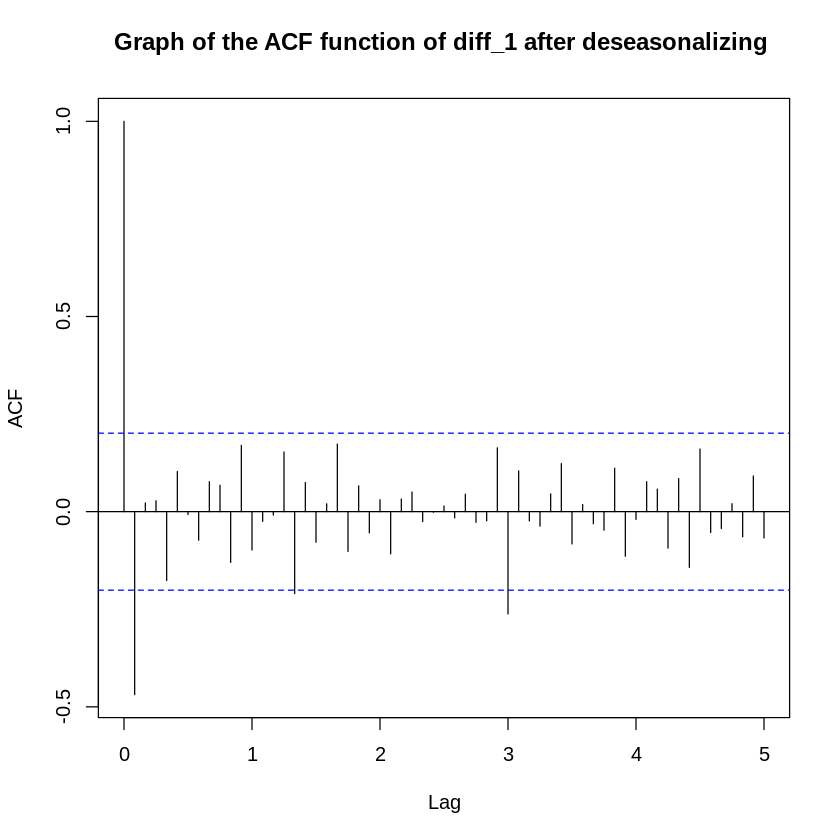

In [ ]:
acf(d1_PI,lag.max = 60,na.action = na.pass,main = "Graph of the ACF function of diff_1 after deseasonalizing ")
acf(d1_PI, lag.max = 60, plot = FALSE)

##PACF: p = 1, p = 2


Partial autocorrelations of series ‘d1_PI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.469 -0.253 -0.107 -0.280 -0.187 -0.133 -0.222 -0.190 -0.017 -0.155  0.022 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
 0.029  0.004 -0.082  0.258  0.008 -0.045 -0.153 -0.138 -0.039 -0.003  0.054 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
 0.002  0.129  0.040 -0.052  0.141  0.114 -0.009 -0.058 -0.036 -0.035 -0.022 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.037  0.156 -0.058 -0.014 -0.014 -0.081 -0.139  0.102 -0.029 -0.076 -0.048 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.060  0.060  0.053 -0.056 -0.037  0.086  0.094 -0.010 -0.113  0.068 -0.037 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.061  0.013 -0.007  0.093  0.002 

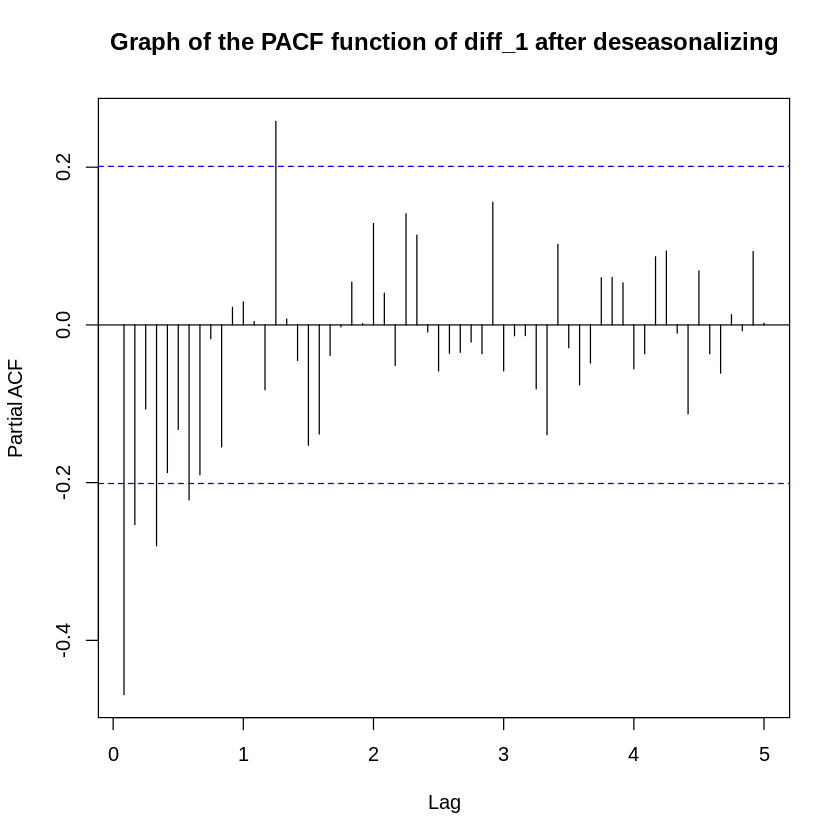

In [ ]:
pacf(d1_PI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function of diff_1 after deseasonalizing")
pacf(d1_PI, lag.max = 60, plot = FALSE)

##Comparing Models

In [ ]:
lambda_choice <- 'auto'

In [ ]:
MH1_PI  <- Arima(DL_PI, order=c(1,1,1), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH2_PI  <- Arima(DL_PI, order=c(1,1,3), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH3_PI  <- Arima(DL_PI, order=c(2,1,1), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH4_PI  <- Arima(DL_PI, order=c(2,1,3), seasonal=list(order=c(1,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH5_PI  <- Arima(DL_PI, order=c(1,1,1), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH6_PI  <- Arima(DL_PI, order=c(1,1,3), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH7_PI  <- Arima(DL_PI, order=c(2,1,1), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH8_PI  <- Arima(DL_PI, order=c(2,1,3), seasonal=list(order=c(1,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH9_PI  <- Arima(DL_PI, order=c(1,1,1), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH10_PI  <- Arima(DL_PI, order=c(1,1,3), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH11_PI  <- Arima(DL_PI, order=c(2,1,1), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH12_PI <- Arima(DL_PI, order=c(2,1,3), seasonal=list(order=c(2,1,1), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
#MH13_PI  <- Arima(DL_PI, order=c(1,1,1), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH14_PI  <- Arima(DL_PI, order=c(1,1,3), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH15_PI  <- Arima(DL_PI, order=c(2,1,1), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

In [ ]:
MH16_PI <- Arima(DL_PI, order=c(2,1,3), seasonal=list(order=c(2,1,2), period=12), lambda=lambda_choice, include.constant=FALSE)

##Checking AIC, BIC

In [ ]:
AIC(MH1_PI,MH3_PI,MH4_PI,MH5_PI,MH7_PI,MH8_PI,MH10_PI,MH11_PI,MH12_PI,MH14_PI,MH15_PI,MH16_PI)
BIC(MH1_PI,MH3_PI,MH4_PI,MH5_PI,MH7_PI,MH8_PI,MH10_PI,MH11_PI,MH12_PI,MH14_PI,MH15_PI,MH16_PI)

,df,AIC
,<dbl>,<dbl>
MH1_PI,5,827.9442
MH3_PI,6,829.6797
MH4_PI,8,829.1866
MH5_PI,6,828.9322
MH7_PI,7,831.6367
MH8_PI,9,826.5764
MH10_PI,8,833.6412
MH11_PI,7,831.3082
MH12_PI,9,828.3873


,df,BIC
,<dbl>,<dbl>
MH1_PI,5,840.0384
MH3_PI,6,844.1927
MH4_PI,8,848.5373
MH5_PI,6,843.4452
MH7_PI,7,848.5686
MH8_PI,9,848.3460
MH10_PI,8,852.9919
MH11_PI,7,848.2401
MH12_PI,9,850.1569


##Choose SARIMA MH1_PI

In [ ]:
Box.test(MH1_PI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH1_PI$residuals
X-squared = 21.91, df = 20, p-value = 0.3454


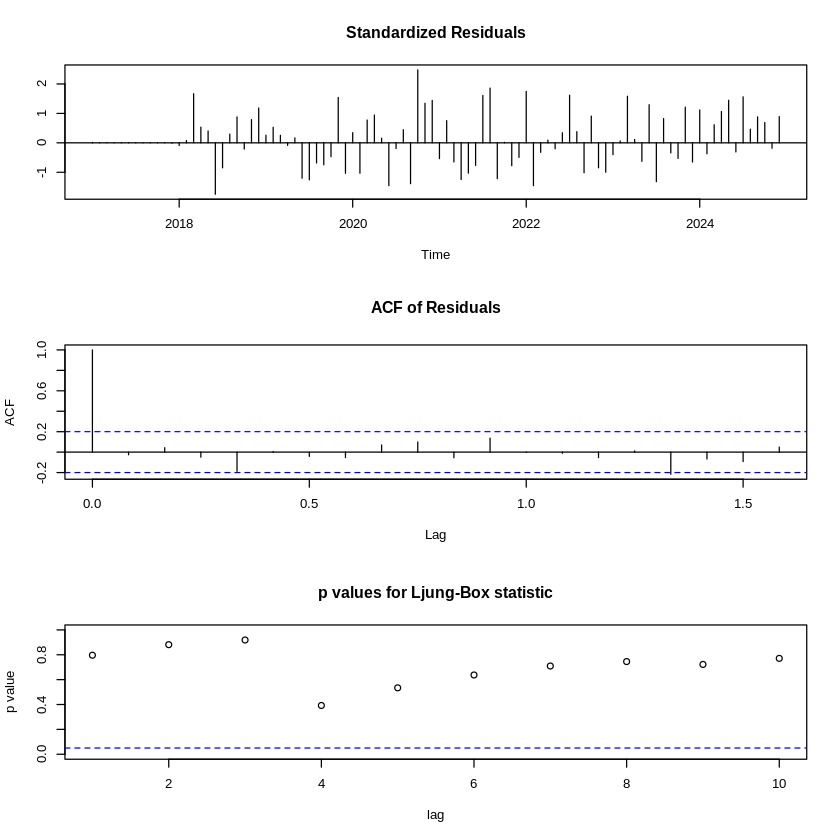


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[12]
Q* = 16.316, df = 15, p-value = 0.3614

Model df: 4.   Total lags used: 19



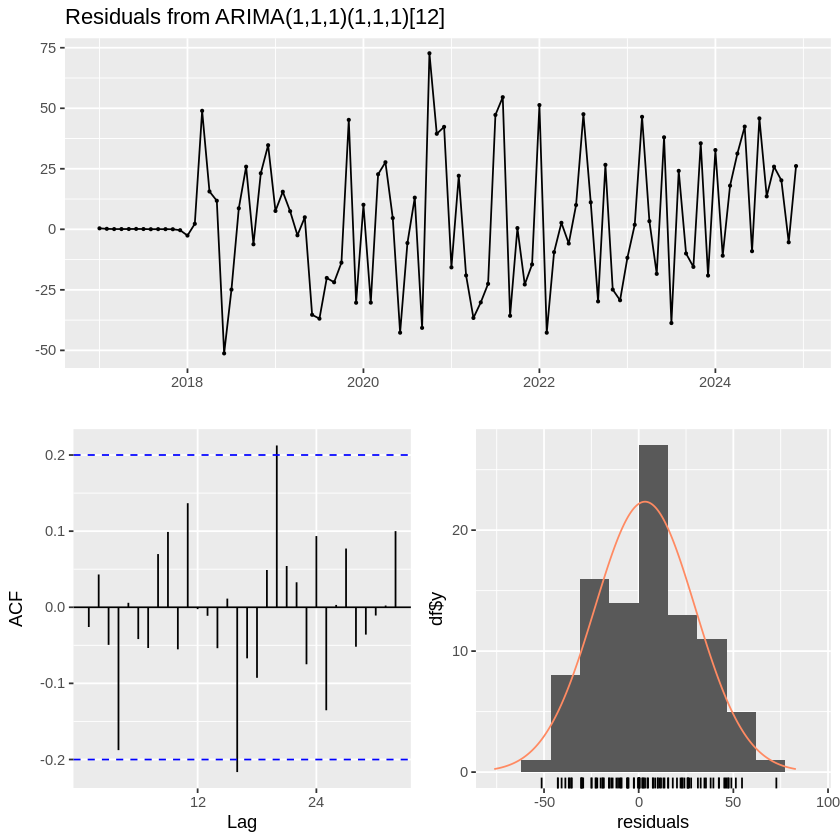

In [ ]:
tsdiag(MH1_PI)
checkresiduals(MH1_PI)

##Choose SARIMA MH5_PI --> Out

In [ ]:
Box.test(MH5_PI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH5_PI$residuals
X-squared = 26.175, df = 20, p-value = 0.1601


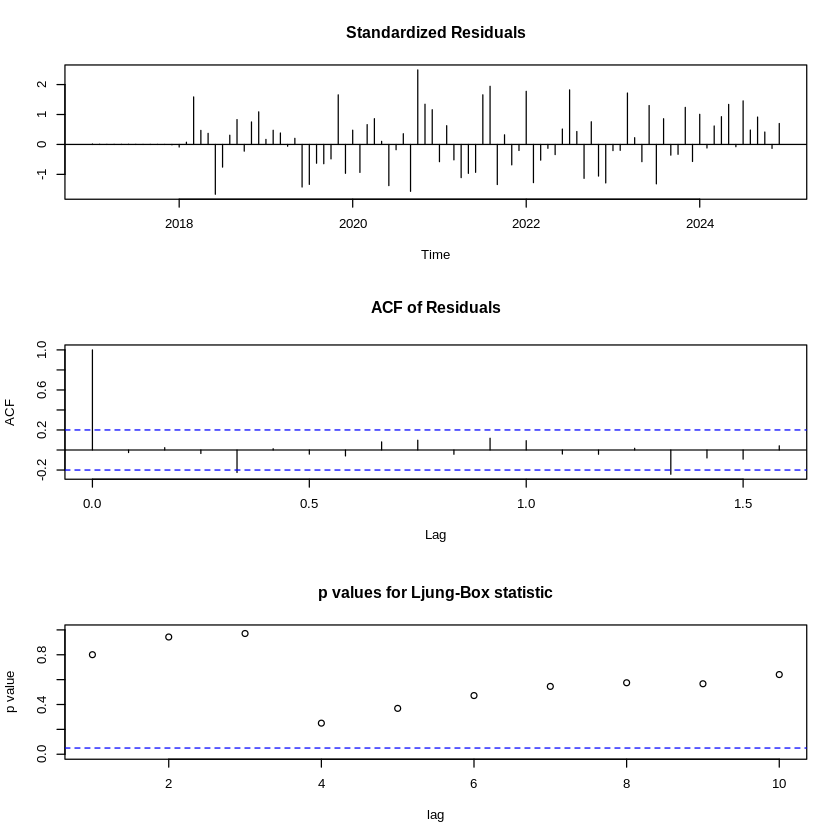


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,2)[12]
Q* = 19.647, df = 14, p-value = 0.1417

Model df: 5.   Total lags used: 19



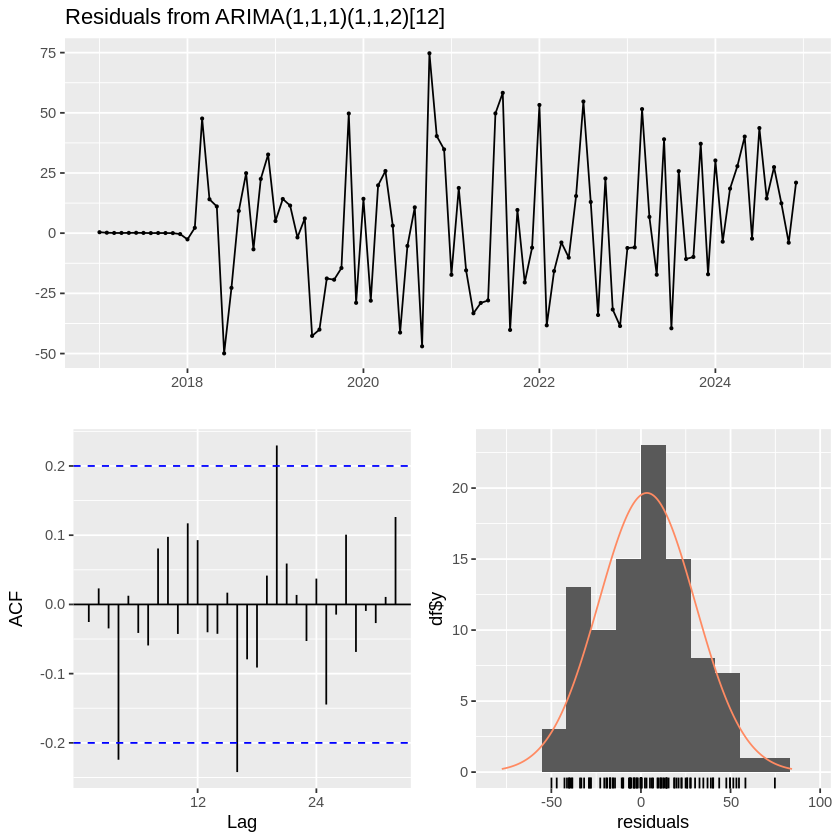

In [ ]:
tsdiag(MH5_PI)
checkresiduals(MH5_PI)

## Choose SARIMA MH8_PI

In [ ]:
Box.test(MH8_PI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH8_PI$residuals
X-squared = 19.114, df = 20, p-value = 0.5144


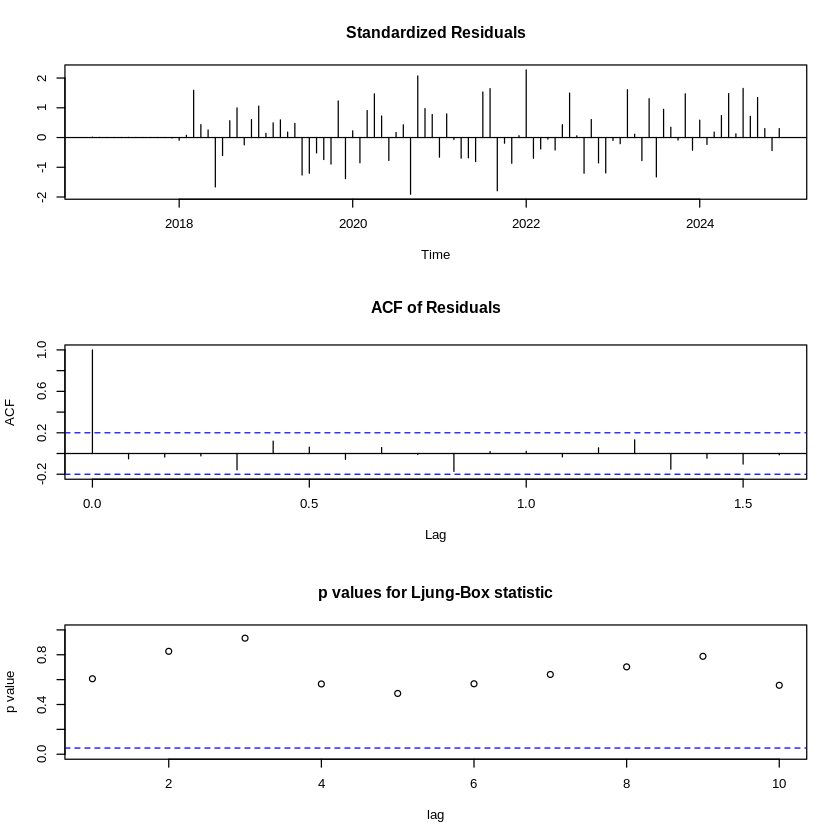


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)(1,1,2)[12]
Q* = 15.57, df = 11, p-value = 0.1579

Model df: 8.   Total lags used: 19



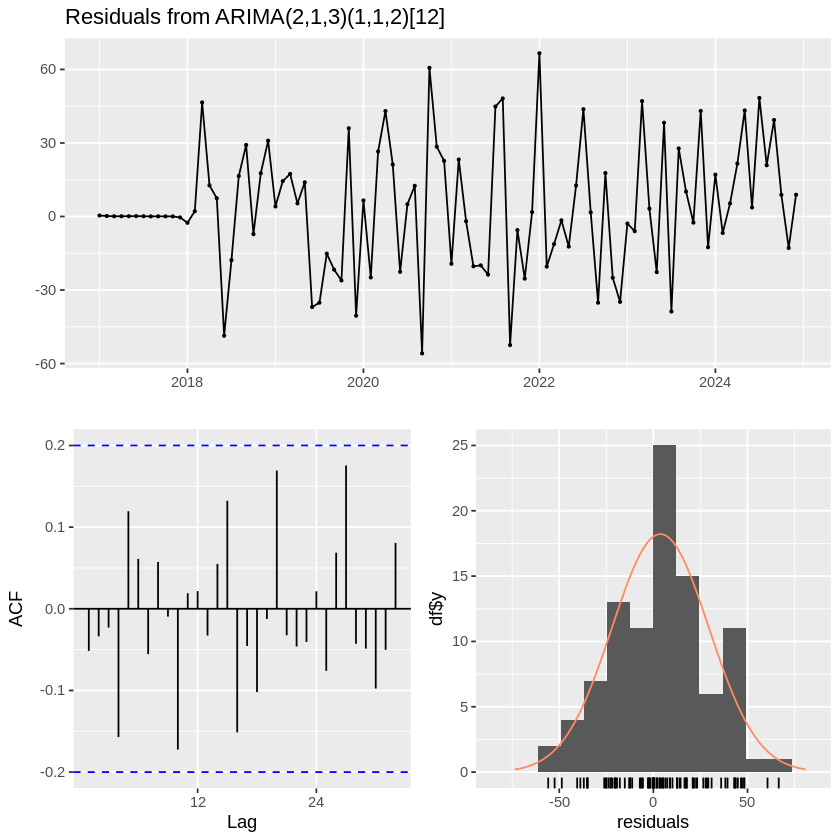

In [ ]:
tsdiag(MH8_PI)
checkresiduals(MH8_PI)

##Accuracy & 6-month forecast with SARIMA MH1_PI

In [ ]:
predMH1_PI <- forecast::forecast(MH1_PI, h = length(test))

In [ ]:

metrics <- function(actual, pred) {
            mae <- mean(abs(actual - pred))
            rmse <- sqrt(mean((actual - pred)^2))
            mape <- 100 * mean(abs((actual - pred) / actual))
            c(MAE = mae, RMSE = rmse, MAPE = mape)}

manual_metrics1_PI<- metrics(test, predMH1_PI$mean)

print(manual_metrics1_PI)

      MAE      RMSE      MAPE 
22.244434 27.607365  2.887656 


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       718.4615 692.9181 743.9429 679.3702 757.4077
Feb 2025       718.4872 692.4430 744.4670 678.6290 758.1946
Mar 2025       729.2402 703.0318 755.3843 689.1310 769.1990
Apr 2025       740.8438 714.4957 767.1279 700.5211 781.0168
May 2025       762.7809 736.3212 789.1780 722.2880 803.1272
Jun 2025       760.6103 733.9813 787.1757 719.8581 801.2137

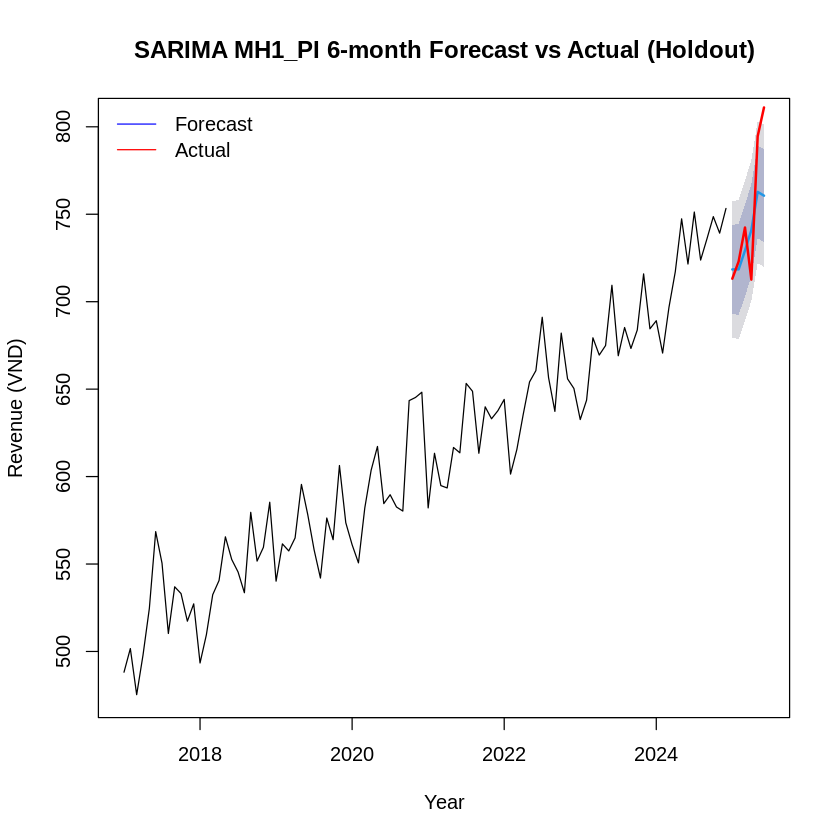

In [ ]:
predMH1_PI = forecast::forecast(MH1_PI, h = 6)

plot(predMH1_PI, main = "SARIMA MH1_PI 6-month Forecast vs Actual (Holdout)",
     xlab = "Year", ylab = "Revenue (VND)")

lines(test, col = "red", lwd = 2)

legend("topleft", legend = c("Forecast", "Actual"),
       col = c("blue", "red"), lty = 1, bty = "n")

predMH1_PI

##Accuracy & 6-month forecast with SARIMA MH8_PI

In [ ]:
predMH8_PI <- forecast::forecast(MH8_PI, h = length(test))

In [ ]:

metrics <- function(actual, pred) {
            mae <- mean(abs(actual - pred))
            rmse <- sqrt(mean((actual - pred)^2))
            mape <- 100 * mean(abs((actual - pred) / actual))
            c(MAE = mae, RMSE = rmse, MAPE = mape)}
manual_metrics8_PI<- metrics(test, predMH8_PI$mean)

print(manual_metrics8_PI)

      MAE      RMSE      MAPE 
23.793387 28.298843  3.120142 


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       727.2865 702.8681 751.6489 689.9184 764.5237
Feb 2025       735.2674 710.6280 759.8503 697.5612 772.8417
Mar 2025       744.8428 720.1157 769.5138 707.0026 782.5518
Apr 2025       746.9785 722.1915 771.7094 709.0465 784.7791
May 2025       761.8305 736.9962 786.6095 723.8266 799.7051
Jun 2025       764.1643 739.1618 789.1110 725.9030 802.2950

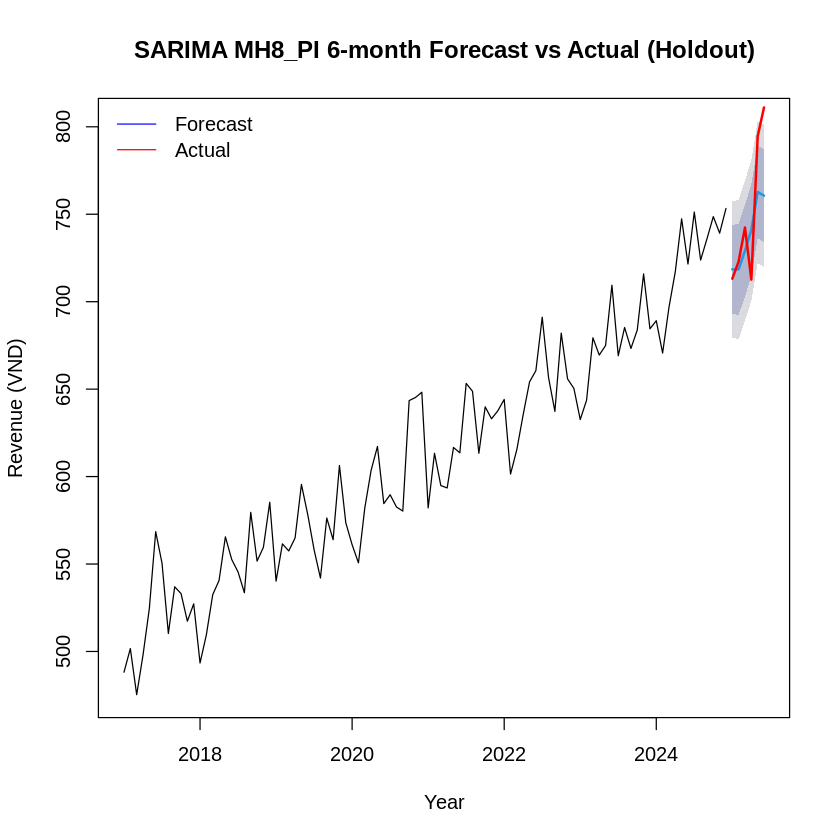

In [ ]:
predMH8_PI = forecast::forecast(MH8_PI, h = 6)

plot(predMH1_PI, main = "SARIMA MH8_PI 6-month Forecast vs Actual (Holdout)",
     xlab = "Year", ylab = "Revenue (VND)")

lines(test, col = "red", lwd = 2)

legend("topleft", legend = c("Forecast", "Actual"),
       col = c("blue", "red"), lty = 1, bty = "n")

predMH8_PI

##XGBOOST with MH1_PI

In [ ]:
re_sarima_PI <- residuals(predMH1_PI)
re_sarima_PI

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,0.40229235,0.19590616,0.09422881,0.10070431,0.11730517,0.15976037,0.11090975,0.03902501,0.07339814,0.06039682,0.03174205,-0.37171768
2018,-2.57962389,2.27219799,48.94718643,15.62866791,11.79055938,-51.26295890,-24.91306024,8.67466893,25.86649796,-6.19188860,23.15293049,34.73307187
2019,7.57949561,15.51986063,7.46793843,-2.47736487,4.96078159,-35.30942772,-36.90781575,-20.09502698,-21.88243098,-13.77888487,45.20542101,-30.33035734
2020,10.14005231,-30.29054854,22.73504709,27.69870351,4.63187730,-42.70570493,-5.66672830,13.07719032,-40.71191257,72.71417360,39.45658282,42.31037890
2021,-15.72609644,22.11499635,-19.05966296,-36.61019842,-30.19947445,-22.52684927,47.25436831,54.57601375,-35.73187762,0.50853886,-22.78464794,-14.50738598
2022,51.31818772,-42.71162182,-9.44910439,2.67816961,-5.86882471,10.01876078,47.53949875,11.13424735,-29.78733344,26.63201350,-24.90574863,-29.31316885
2023,-11.76683169,1.86818643,46.45607258,3.35757360,-18.40483081,38.00743837,-38.72832669,24.13490277,-9.99147020,-15.53320948,35.52704252,-19.10764894
2024,32.74317449,-10.90800384,18.00528012,31.27915223,42.43091160,-9.03734669,45.82627999,13.60698192,25.87400919,20.21504933,-5.36293606,26.12224714


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df_PI <- data.table(
  residual_PI = as.numeric(re_sarima_PI)
)


In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df_PI[, `:=`(
  lag1 = shift(residual_PI, 1),
  lag2 = shift(residual_PI, 2),
  lag3 = shift(residual_PI, 3)
)]
df_PI <- na.omit(df_PI)



In [ ]:
# Dữ liệu XGBoost
train_matrix <- as.matrix(df_PI[, .(lag1, lag2, lag3)])
train_label <- df_PI$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)



In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 5, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 300)
residual_forecast_PI <- c()
lag_vals <- tail(re_sarima_PI, 3)
for (i in 1:6) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast_PI <- c(residual_forecast_PI, pred)
  lag_vals <- c(lag_vals, pred)
}


In [ ]:
# SARIMA dự báo
sarima_pred_PI <- as.numeric(predMH1_PI$mean)
print(sarima_pred_PI)


[1] 718.4615 718.4872 729.2402 740.8438 762.7809 760.6103


In [ ]:
# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast_PI <- sarima_pred_PI + residual_forecast_PI


In [ ]:
length(sarima_pred_PI)
length(residual_forecast_PI)
length(hybrid_forecast_PI)

[1] 6

[1] 6

[1] 6

In [ ]:
# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-01-01"), by = "month", length.out = 6),
  SARIMA = sarima_pred_PI,
  Residual = residual_forecast_PI,
  Hybrid = hybrid_forecast_PI
))

       Month   SARIMA  Residual   Hybrid
1 2025-01-01 718.4615 29.563969 748.0254
2 2025-02-01 718.4872 18.647486 737.1347
3 2025-03-01 729.2402 -5.819034 723.4212
4 2025-04-01 740.8438 41.536366 782.3801
5 2025-05-01 762.7809 30.992546 793.7735
6 2025-06-01 760.6103 38.280087 798.8904


Warning message:
“attributes are not identical across measure variables; they will be dropped”


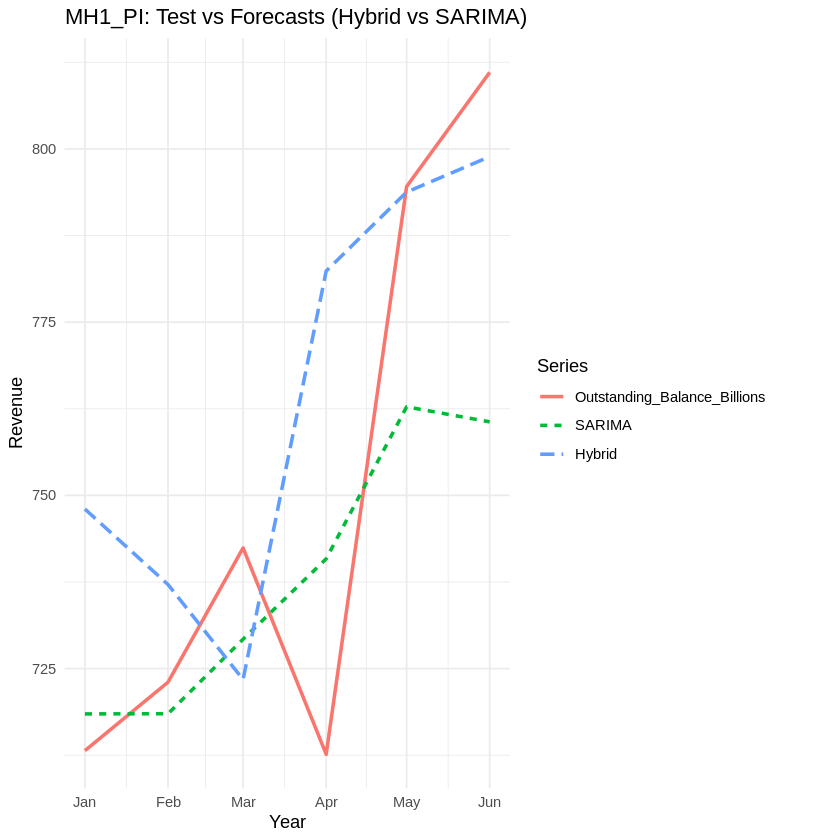

In [ ]:
Year <- seq.Date(from = as.Date("2025-01-01"),
                 to = as.Date("2025-06-01"),
                 by = "month")

df <- data.frame(
  Year = Year,
  Test = test,
  SARIMA = predMH1_PI$mean,
  Hybrid = hybrid_forecast_PI
)

df <- as.data.table(df)
df_long <- melt(df, id.vars = "Year",
                variable.name = "Series",
                value.name = "Value")

ggplot(df_long, aes(x = Year, y = Value, color = Series, linetype = Series)) +
  geom_line(size = 1) +
  labs(title = "MH1_PI: Test vs Forecasts (Hybrid vs SARIMA)",
       x = "Year", y = "Revenue") +
  theme_minimal()


In [ ]:
predmhhybrid_PI <- forecast::forecast(hybrid_forecast_PI, h = length(test))

##Accuracy with Hybrid MH1_PI

In [ ]:
metrics <- function(actual, pred) {
  # ép kiểu numeric để tránh lỗi frequency
  actual <- as.numeric(actual)
  pred <- as.numeric(pred)

  mae <- mean(abs(actual - pred))
  rmse <- sqrt(mean((actual - pred)^2))
  mape <- 100 * mean(abs((actual - pred) / actual))

  c(MAE = mae, RMSE = rmse, MAPE = mape)
}

manual_metrics_hybrid_PI <- metrics(test, predmhhybrid_PI$mean)
print(manual_metrics_hybrid_PI)

      MAE      RMSE      MAPE 
53.466953 63.114203  7.377818 


##XGBOOST MH8_PI

In [ ]:
re_sarima_PI8 <- residuals(predMH8_PI)
re_sarima_PI8

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,0.40229233,0.19590615,0.09422876,0.10070426,0.11730514,0.15976036,0.11090979,0.03902509,0.07339825,0.06039692,0.03174213,-0.37171778
2018,-2.57962036,2.17223680,46.53181525,12.72842187,7.42128168,-48.64157990,-17.81249603,16.53844790,29.17879899,-7.18881582,17.68273504,30.94230342
2019,4.10341086,14.44522575,17.38266515,5.34174095,13.95412305,-36.93787336,-35.16828547,-15.17187326,-21.66695538,-26.10570145,36.01090906,-40.47790390
2020,6.54876333,-24.87153605,26.52986061,43.03264433,21.19439621,-22.59252913,5.00045168,12.52335118,-55.86014743,60.64216853,28.47588186,22.69826841
2021,-19.30249869,23.24051396,-1.94111328,-20.31580215,-19.94841173,-23.71060539,44.87029839,48.16688338,-52.46522748,-5.55190922,-25.35261358,1.77095721
2022,66.59578933,-20.43361202,-11.24859850,-1.55568323,-12.26735358,12.63008551,43.79123838,1.66655506,-35.17586676,17.71973634,-25.00261271,-34.82625182
2023,-2.86355232,-6.01433188,47.09461693,3.21868372,-22.69759839,38.25488911,-38.78330129,27.77045811,10.15322367,-2.49256078,43.07899591,-12.53331843
2024,17.08534932,-6.73561664,5.35472716,21.58636723,43.26596956,3.65903151,48.36710759,20.89091283,39.38566109,8.85532709,-12.84867536,8.87475022


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df_PI8 <- data.table(
  residual_PI8 = as.numeric(re_sarima_PI8)
)


In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df_PI8[, `:=`(
  lag1 = shift(residual_PI8, 1),
  lag2 = shift(residual_PI8, 2),
  lag3 = shift(residual_PI8, 3)
)]
df_PI8 <- na.omit(df_PI8)



In [ ]:
# Dữ liệu XGBoost
train_matrix <- as.matrix(df_PI8[, .(lag1, lag2, lag3)])
train_label <- df_PI8$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)



In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 5, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 300)
residual_forecast_PI8 <- c()
lag_vals <- tail(re_sarima_PI8, 3)
for (i in 1:6) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast_PI8 <- c(residual_forecast_PI8, pred)
  lag_vals <- c(lag_vals, pred)
}


In [ ]:
# SARIMA dự báo
sarima_pred_PI8 <- as.numeric(predMH8_PI$mean)
print(sarima_pred_PI8)


[1] 727.2865 735.2674 744.8428 746.9785 761.8305 764.1643


In [ ]:
# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast_PI8 <- sarima_pred_PI8 + residual_forecast_PI8


In [ ]:
length(sarima_pred_PI8)
length(residual_forecast_PI8)
length(hybrid_forecast_PI8)

[1] 6

[1] 6

[1] 6

In [ ]:
# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-01-01"), by = "month", length.out = 6),
  SARIMA = sarima_pred_PI8,
  Residual = residual_forecast_PI8,
  Hybrid = hybrid_forecast_PI8
))

       Month   SARIMA    Residual   Hybrid
1 2025-01-01 727.2865  -0.2424077 727.0441
2 2025-02-01 735.2674  13.7868004 749.0542
3 2025-03-01 744.8428 -19.2334175 725.6093
4 2025-04-01 746.9785 -21.2168427 725.7617
5 2025-05-01 761.8305 -17.5402946 744.2902
6 2025-06-01 764.1643  12.9422321 777.1066


Warning message:
“attributes are not identical across measure variables; they will be dropped”


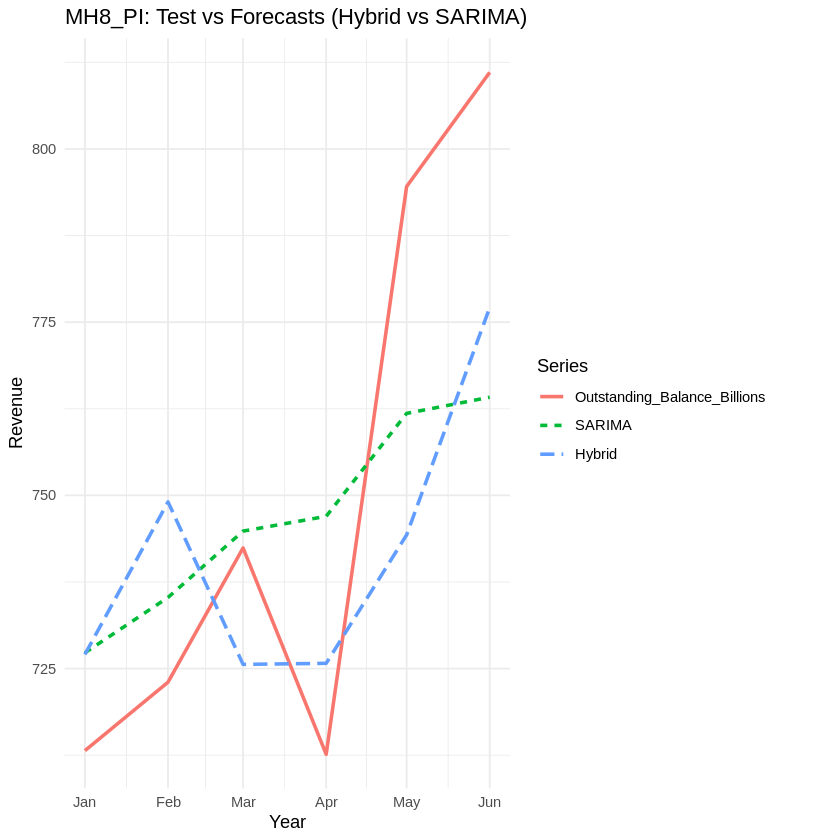

In [ ]:
Year <- seq.Date(from = as.Date("2025-01-01"),
                 to = as.Date("2025-06-01"),
                 by = "month")

df <- data.frame(
  Year = Year,
  Test = test,
  SARIMA = predMH8_PI$mean,
  Hybrid = hybrid_forecast_PI8
)

df <- as.data.table(df)
df_long <- melt(df, id.vars = "Year",
                variable.name = "Series",
                value.name = "Value")

ggplot(df_long, aes(x = Year, y = Value, color = Series, linetype = Series)) +
  geom_line(size = 1) +
  labs(title = "MH8_PI: Test vs Forecasts (Hybrid vs SARIMA)",
       x = "Year", y = "Revenue") +
  theme_minimal()


In [ ]:
predmhhybrid_PI8 <- forecast::forecast(hybrid_forecast_PI8, h = length(test))

##Accuracy with Hybrid MH8_PI

In [ ]:
metrics <- function(actual, pred) {

  actual <- as.numeric(actual)
  pred <- as.numeric(pred)

  mae <- mean(abs(actual - pred))
  rmse <- sqrt(mean((actual - pred)^2))
  mape <- 100 * mean(abs((actual - pred) / actual))

  c(MAE = mae, RMSE = rmse, MAPE = mape)
}

manual_metrics_hybrid_PI8 <- metrics(test, predmhhybrid_PI8$mean)
print(manual_metrics_hybrid_PI8)

      MAE      RMSE      MAPE 
44.765517 48.011387  6.091414 


#Conclusion: Choosing SARIMA MH5_SVMI --> Foracasting for the next 12 months

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 96 rows containing missing values or values outside the scale range
(`geom_line()`).”


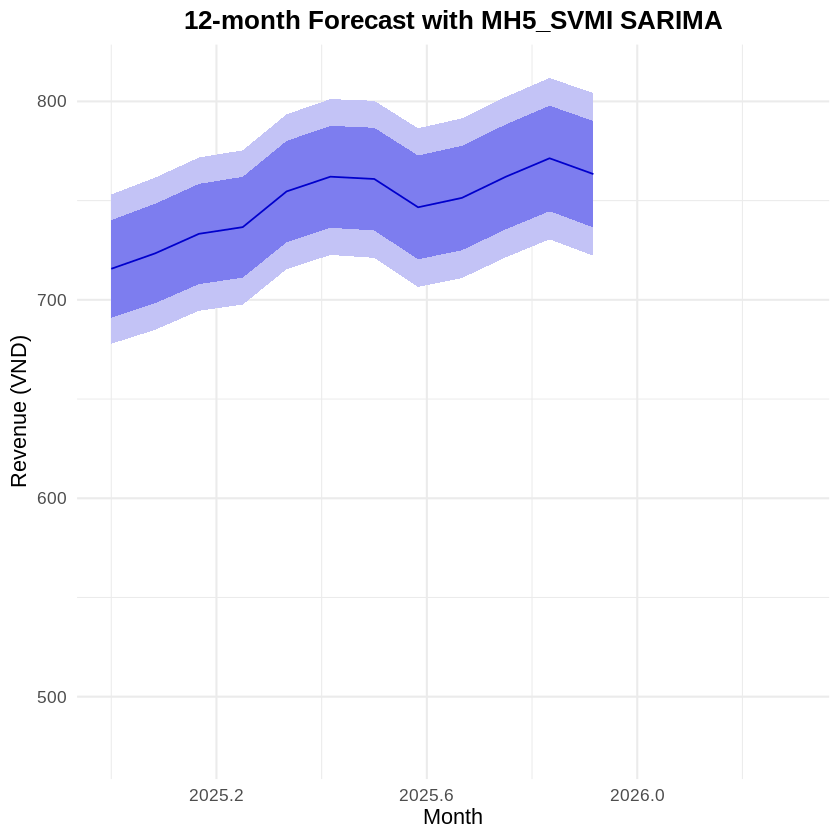

In [ ]:
predMH5_SVMI <- forecast::forecast(MH5_SVMI, h = 12)
autoplot(predMH5_SVMI) +
  ggtitle("12-month Forecast with MH5_SVMI SARIMA") +
  ylab("Revenue (VND)") +
  xlab("Month") +
  xlim(c(2025, 2026.3)) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "top"
  )


In [ ]:
print(predMH5_SVMI)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       715.6463 690.9719 740.1805 677.8511 753.1134
Feb 2025       723.4060 698.2602 748.4077 684.8882 761.5867
Mar 2025       733.2605 707.9481 758.4288 694.4880 771.6960
Apr 2025       736.6418 711.1464 761.9918 697.5888 775.3546
May 2025       754.6338 729.0436 780.0811 715.4367 793.4963
Jun 2025       762.0549 736.3102 787.6563 722.6215 801.1529
Jul 2025       760.9032 734.9566 786.7039 721.1600 800.3052
Aug 2025       746.6418 720.4176 772.7142 706.4714 786.4569
Sep 2025       751.3810 724.9921 777.6173 710.9583 791.4464
Oct 2025       762.0180 735.5008 788.3832 721.3994 802.2809
Nov 2025       771.3321 744.6799 797.8326 730.5071 811.8020
Dec 2025       763.3637 736.4742 790.0971 722.1740 804.1881
